# Kickstarter Individual Project
# INSY662 - Data Mining and Visualization
### By: Liliana Garcia Caraballo - MMA7 Student - McGill University

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import scipy as sc
from sklearn.linear_model import LogisticRegression

In [67]:
# Reading the dataset
kick_df = pd.read_excel("Kickstarter.xlsx")

## PART 1: Classification Model

In [7]:
kick_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15215 non-null  int64         
 1   name                      15215 non-null  object        
 2   goal                      15215 non-null  int64         
 3   pledged                   15215 non-null  float64       
 4   state                     15215 non-null  object        
 5   disable_communication     15215 non-null  bool          
 6   country                   15215 non-null  object        
 7   currency                  15215 non-null  object        
 8   deadline                  15215 non-null  datetime64[ns]
 9   state_changed_at          15215 non-null  datetime64[ns]
 10  created_at                15215 non-null  datetime64[ns]
 11  launched_at               15215 non-null  datetime64[ns]
 12  staff_pick        

#### Considering that the classification task is assumed to be done at the time each project is launched. In other words, we execute the model to predict whether a new project is going to be successful or not, at the moment when the project owner submits the project. Therefore, the model should only use the predictors that are available at the moment when a new project is launched.

#### Let's review the possible predictors to use. In this case, I dropped the following variables since they are known after the project is launched: 'pledged','disable_communication', 'state_changed_at', 'staff_pick', 'backers_count','usd_pledged','spotlight','staff_pick','state_changed_at_month','state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'state_changed_at_weekday','staff_pick.1'

In [8]:
kick_df = kick_df.drop(columns=['pledged','disable_communication', 'state_changed_at', 'staff_pick',
                                'backers_count','usd_pledged','spotlight','staff_pick','state_changed_at_month',
                                'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'state_changed_at_weekday','staff_pick.1'])
kick_df

id                                               name   goal  \
0        22292                          Golgotha - A Feature Film   5500   
1        82234                     Vinca is opening a storefront!  10000   
2        86478    The next Paul Jacobsen & The Madison Arm album!   8500   
3       127446                 Erin Heist First Full-Length Album   5000   
4       151612  Earth Day Heritage: A Celebration in Music and...  15000   
...        ...                                                ...    ...   
15210  4533276                     AN SCP LIVE ACTION MINI SERIES   2000   
15211  4533396  Seaworthy Seductions - Art Exhibit + Community...   5000   
15212  4533462                                  The Second Coming    500   
15213  4533499  Eugene Art House presents: The Films of Federi...   5975   
15214  4533733  Make 100 Journals of Breesa Dreamin' In the Ap...   1500   

            state country currency            deadline          created_at  \
0      successful      US      USD 2017-07-09 04:59:00 2011-02-01 23:25:17   
1      successful      US      USD 2018-10-25 14:29:30 2012-02-28 21:10:07   
2      successful      US      USD 2019-05-05 16:37:46 2012-03-01 22:06:25   
3      successful      US      USD 2021-11-25 21:00:14 2012-04-03 22:44:17   
4          failed      US      USD 2021-04-15 21:22:00 2012-04-20 21:06:46   
...           ...     ...      ...                 ...                 ...   
15210  successful      GB      GBP 2023-10-18 17:41:20 2022-12-30 16:40:09   
15211  successful      US      USD 2023-04-01 03:11:00 2022-12-30 21:41:59   
15212  successful      US      USD 2023-04-20 07:15:27 2022-12-31 01:16:21   
15213  successful      US      USD 2023-01-25 07:59:00 2022-12-31 03:41:13   
15214      failed      US      USD 2023-02-01 19:39:48 2022-12-31 19:53:25   

              launched_at  static_usd_rate  ... created_at_day  created_at_yr  \
0     2017-06-03 16:05:54           1.0000  ...              1           2011   
1     2018-09-25 14:29:30           1.0000  ...             28           2012   
2     2019-04-05 16:37:46           1.0000  ...              1           2012   
3     2021-10-26 20:00:14           1.0000  ...              3           2012   
4     2021-03-15 19:42:17           1.0000  ...             20           2012   
...                   ...              ...  ...            ...            ...   
15210 2023-09-18 17:41:20           1.2386  ...             30           2022   
15211 2023-03-06 23:43:35           1.0000  ...             30           2022   
15212 2023-03-31 07:15:27           1.0000  ...             31           2022   
15213 2023-01-01 22:32:42           1.0000  ...             31           2022   
15214 2023-01-02 19:39:48           1.0000  ...             31           2022   

       created_at_hr  launched_at_month  launched_at_day launched_at_yr  \
0                 23                  6                3           2017   
1                 21                  9               25           2018   
2                 22                  4                5           2019   
3                 22                 10               26           2021   
4                 21                  3               15           2021   
...              ...                ...              ...            ...   
15210             16                  9               18           2023   
15211             21                  3                6           2023   
15212              1                  3               31           2023   
15213              3                  1                1           2023   
15214             19                  1                2           2023   

      launched_at_hr main_category  show_feature_image  video  
0                 16  Film & Video               False   True  
1                 14       Fashion               False   True  
2                 16         Music               False   True  
3                 20         Mus

In [9]:
kick_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15215 non-null  int64         
 1   name                 15215 non-null  object        
 2   goal                 15215 non-null  int64         
 3   state                15215 non-null  object        
 4   country              15215 non-null  object        
 5   currency             15215 non-null  object        
 6   deadline             15215 non-null  datetime64[ns]
 7   created_at           15215 non-null  datetime64[ns]
 8   launched_at          15215 non-null  datetime64[ns]
 9   static_usd_rate      15215 non-null  float64       
 10  category             15215 non-null  object        
 11  name_len             15215 non-null  int64         
 12  name_len_clean       15215 non-null  int64         
 13  blurb_len            15215 non-

## 1. Data Pre-processing

### Dropping states different than 'successful' and 'failed'

In [10]:
states = ['successful','failed']
kick_df = kick_df[kick_df['state'].isin(states)]
kick_df

id                                               name   goal  \
0        22292                          Golgotha - A Feature Film   5500   
1        82234                     Vinca is opening a storefront!  10000   
2        86478    The next Paul Jacobsen & The Madison Arm album!   8500   
3       127446                 Erin Heist First Full-Length Album   5000   
4       151612  Earth Day Heritage: A Celebration in Music and...  15000   
...        ...                                                ...    ...   
15210  4533276                     AN SCP LIVE ACTION MINI SERIES   2000   
15211  4533396  Seaworthy Seductions - Art Exhibit + Community...   5000   
15212  4533462                                  The Second Coming    500   
15213  4533499  Eugene Art House presents: The Films of Federi...   5975   
15214  4533733  Make 100 Journals of Breesa Dreamin' In the Ap...   1500   

            state country currency            deadline          created_at  \
0      successful      US      USD 2017-07-09 04:59:00 2011-02-01 23:25:17   
1      successful      US      USD 2018-10-25 14:29:30 2012-02-28 21:10:07   
2      successful      US      USD 2019-05-05 16:37:46 2012-03-01 22:06:25   
3      successful      US      USD 2021-11-25 21:00:14 2012-04-03 22:44:17   
4          failed      US      USD 2021-04-15 21:22:00 2012-04-20 21:06:46   
...           ...     ...      ...                 ...                 ...   
15210  successful      GB      GBP 2023-10-18 17:41:20 2022-12-30 16:40:09   
15211  successful      US      USD 2023-04-01 03:11:00 2022-12-30 21:41:59   
15212  successful      US      USD 2023-04-20 07:15:27 2022-12-31 01:16:21   
15213  successful      US      USD 2023-01-25 07:59:00 2022-12-31 03:41:13   
15214      failed      US      USD 2023-02-01 19:39:48 2022-12-31 19:53:25   

              launched_at  static_usd_rate  ... created_at_day  created_at_yr  \
0     2017-06-03 16:05:54           1.0000  ...              1           2011   
1     2018-09-25 14:29:30           1.0000  ...             28           2012   
2     2019-04-05 16:37:46           1.0000  ...              1           2012   
3     2021-10-26 20:00:14           1.0000  ...              3           2012   
4     2021-03-15 19:42:17           1.0000  ...             20           2012   
...                   ...              ...  ...            ...            ...   
15210 2023-09-18 17:41:20           1.2386  ...             30           2022   
15211 2023-03-06 23:43:35           1.0000  ...             30           2022   
15212 2023-03-31 07:15:27           1.0000  ...             31           2022   
15213 2023-01-01 22:32:42           1.0000  ...             31           2022   
15214 2023-01-02 19:39:48           1.0000  ...             31           2022   

       created_at_hr  launched_at_month  launched_at_day launched_at_yr  \
0                 23                  6                3           2017   
1                 21                  9               25           2018   
2                 22                  4                5           2019   
3                 22                 10               26           2021   
4                 21                  3               15           2021   
...              ...                ...              ...            ...   
15210             16                  9               18           2023   
15211             21                  3                6           2023   
15212              1                  3               31           2023   
15213              3                  1                1           2023   
15214             19                  1                2           2023   

      launched_at_hr main_category  show_feature_image  video  
0                 16  Film & Video               False   True  
1                 14       Fashion               False   True  
2                 16         Music               False   True  
3                 20         Mus

In [11]:
kick_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 15214
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   14463 non-null  int64         
 1   name                 14463 non-null  object        
 2   goal                 14463 non-null  int64         
 3   state                14463 non-null  object        
 4   country              14463 non-null  object        
 5   currency             14463 non-null  object        
 6   deadline             14463 non-null  datetime64[ns]
 7   created_at           14463 non-null  datetime64[ns]
 8   launched_at          14463 non-null  datetime64[ns]
 9   static_usd_rate      14463 non-null  float64       
 10  category             14463 non-null  object        
 11  name_len             14463 non-null  int64         
 12  name_len_clean       14463 non-null  int64         
 13  blurb_len            14463 non-null 

### Checking for missing values
##### The variable 'main_category' seems to have some missing values, so let's visualize it.

<Axes: >

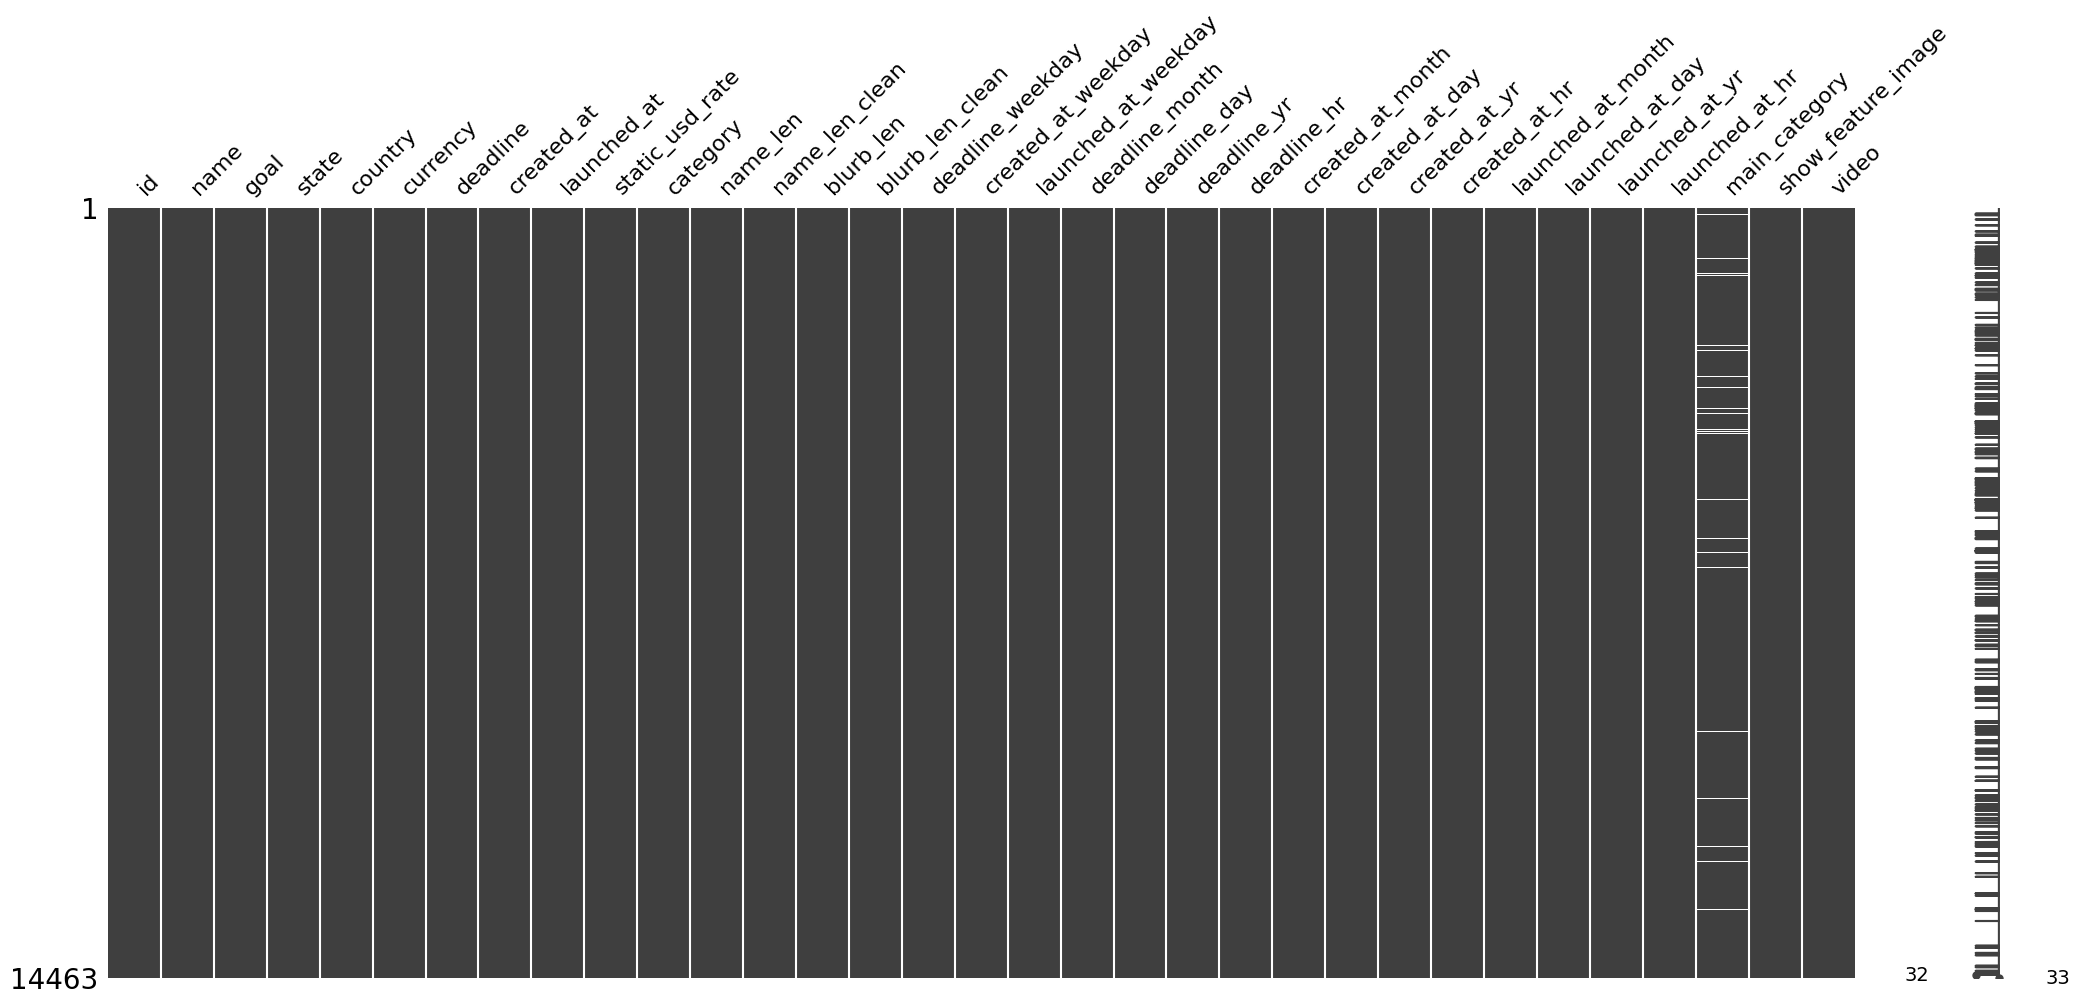

In [12]:
import missingno as msno
msno.matrix(kick_df)

In [13]:
rows_with_missing = kick_df[kick_df.isnull().any(axis=1)]
rows_with_missing.head(10)


id                                            name   goal  \
113  2337503         Punny Buns 2: Cute Plush Bunnys Return!   9000   
131  2449517                          The Real Face of Jesus   2600   
143  2530250                                  Off Assignment  25000   
228  2715306                                   Siliski Soaps   1000   
348  2798688      Oracle's Crest Tarot Enamel Pin Collection   1200   
465  2824274      Make 100: Handmade Acorns in a Felt Forest    130   
532  2833992      Lost Art Lettering - Card Writing Services   1500   
552  2836782                     Moon Sphynx Cat Enamel Pins    570   
690  2855308                               The Moroccan Desk    300   
769  2868290  April Sellers Dance Collective ANIMAL CORRIDOR   5000   

          state country currency            deadline          created_at  \
113  successful      US      USD 2017-03-21 04:00:00 2016-01-24 06:53:39   
131  successful      HN      GBP 2018-10-08 20:14:02 2016-03-31 18:24:14   
143  successful      US      USD 2017-03-11 17:16:03 2016-05-24 19:19:31   
228  successful      US      USD 2017-03-13 23:16:30 2016-10-11 23:07:43   
348  successful      US      USD 2017-02-10 18:22:06 2016-12-13 23:16:55   
465  successful      US      USD 2017-02-23 19:00:17 2017-01-06 14:38:38   
532  successful      US      USD 2017-01-28 06:00:00 2017-01-13 03:37:34   
552  successful      DE      EUR 2017-02-14 21:20:08 2017-01-15 11:56:50   
690  successful      MA      USD 2017-03-27 21:50:00 2017-01-28 21:04:10   
769  successful      US      USD 2017-03-10 05:59:00 2017-02-06 22:43:59   

            launched_at  static_usd_rate  ... created_at_day  created_at_yr  \
113 2017-03-01 14:44:43         1.000000  ...             24           2016   
131 2018-09-24 20:14:02         1.307301  ...             31           2016   
143 2017-02-09 17:16:03         1.000000  ...             24           2016   
228 2017-02-12 00:16:30         1.000000  ...             11           2016   
348 2017-01-11 18:22:06         1.000000  ...             13           2016   
465 2017-01-24 19:00:17         1.000000  ...              6           2017   
532 2017-01-13 06:32:00         1.000000  ...             13           2017   
552 2017-01-15 21:20:08         1.064275  ...             15           2017   
690 2017-01-28 22:52:35         1.000000  ...             28           2017   
769 2017-02-14 16:37:32         1.000000  ...              6           2017   

     created_at_hr  launched_at_month  launched_at_day launched_at_yr  \
113              6                  3                1           2017   
131             18                  9               24           2018   
143             19                  2                9           2017   
228             23                  2               12           2017   
348             23                  1               11           2017   
465             14                  1               24           2017   
532              3                  1               13           2017   
552             11                  1               15           2017   
690             21                  1               28           2017   
769             22                  2               14           2017   

    launched_at_hr main_category  show_feature_image  video  
113             14           NaN               False   True  
131             20           NaN               False   True  
143             17           NaN               False   True  
228              0           NaN               False  False  
348             18           NaN               False  False  
465             19           NaN                True   True  
532              6           NaN               False   True  
552             21           NaN               False  False  
690             22           NaN               False  False  
769             16           NaN               False   True  

[10 rows x 33 columns]

In [14]:
print('The percentage of missing values for the main_category is',round((len(rows_with_missing['id'])/len(kick_df['id']))*100,3),'%')

The percentage of missing values for the main_category is 1.922 %


#### Considering that we have almost 2% of missing values in the main category variable. Let's try to see if we can fix this problem.

In [15]:
rows_with_missing = rows_with_missing.filter(items=['main_category','state','category'])
rows_with_missing.groupby('category').count().sort_values(by=['state'], ascending=False)

main_category  state
category                          
Crafts                    0    165
Photography               0     42
Journalism                0     34
Dance                     0     18
Music                     0      9
Fashion                   0      7
Technology                0      2
Film & Video              0      1

#### Let's try to see which is the main category with the highest value per each category, to use it as a method to handle the missing values issue for this the main category variable.

In [16]:
df_main_categories = kick_df.filter(items=['main_category','state','category'])
subcategory_counts = df_main_categories.groupby(['main_category','category']).size().reset_index(name='counts')
max_subcategory_counts = subcategory_counts.loc[subcategory_counts.groupby('main_category')['counts'].idxmax()]
max_subcategory_counts


main_category          category  counts
2             Art       Digital Art     270
12         Comics       Anthologies     141
15         Crafts               DIY     192
25          Dance      Performances      65
31         Design    Graphic Design     204
36        Fashion       Accessories     368
58   Film & Video            Shorts     301
65           Food            Drinks     335
77          Games     Playing Cards     231
85     Journalism               Web     161
90          Music    Country & Folk     267
108   Photography        Photobooks     372
114    Publishing  Children's Books     300
139    Technology               Web     287
143       Theater           Musical      91

##### Now that we know that the categories with missing values in the main category are actually types of the 'main category' variable, let's drop the counts column and replace the missing values of the 'main category' column with its 'category' name and change the category name with the 'category' with the highest value in the max_subcategory_counts dataframe.

In [17]:
rows_with_missing['main_category'] = rows_with_missing['main_category'].fillna(rows_with_missing['category'])
for index, row in max_subcategory_counts.iterrows():
    main_category = row['main_category']
    category = row['category']
    rows_with_missing.loc[
        rows_with_missing['main_category'] == main_category, 'category'
    ] = category

rows_with_missing.head(10)

main_category       state      category
113        Crafts  successful           DIY
131   Photography  successful    Photobooks
143    Journalism  successful           Web
228        Crafts  successful           DIY
348        Crafts  successful           DIY
465        Crafts  successful           DIY
532        Crafts  successful           DIY
552        Crafts  successful           DIY
690        Crafts  successful           DIY
769         Dance  successful  Performances

##### Now let's replace this dataframe (rows_with_missing) in the original dataframe (kick_df)

In [18]:
kick_df_copy = kick_df.copy()
result = kick_df_copy.join(rows_with_missing, how='left', rsuffix='_df2')
result.head(5)

id                                               name   goal  \
0   22292                          Golgotha - A Feature Film   5500   
1   82234                     Vinca is opening a storefront!  10000   
2   86478    The next Paul Jacobsen & The Madison Arm album!   8500   
3  127446                 Erin Heist First Full-Length Album   5000   
4  151612  Earth Day Heritage: A Celebration in Music and...  15000   

        state country currency            deadline          created_at  \
0  successful      US      USD 2017-07-09 04:59:00 2011-02-01 23:25:17   
1  successful      US      USD 2018-10-25 14:29:30 2012-02-28 21:10:07   
2  successful      US      USD 2019-05-05 16:37:46 2012-03-01 22:06:25   
3  successful      US      USD 2021-11-25 21:00:14 2012-04-03 22:44:17   
4      failed      US      USD 2021-04-15 21:22:00 2012-04-20 21:06:46   

          launched_at  static_usd_rate  ... launched_at_month  \
0 2017-06-03 16:05:54              1.0  ...                 6   
1 2018-09-25 14:29:30              1.0  ...                 9   
2 2019-04-05 16:37:46              1.0  ...                 4   
3 2021-10-26 20:00:14              1.0  ...                10   
4 2021-03-15 19:42:17              1.0  ...                 3   

   launched_at_day  launched_at_yr  launched_at_hr  main_category  \
0                3            2017              16   Film & Video   
1               25            2018              14        Fashion   
2                5            2019              16          Music   
3               26            2021              20          Music   
4               15            2021              19          Music   

  show_feature_image video main_category_df2  state_df2  category_df2  
0              False  True               NaN        NaN           NaN  
1              False  True               NaN        NaN           NaN  
2              False  True               NaN        NaN           NaN  
3              False  True               NaN        NaN           NaN  
4              False  True               NaN        NaN           NaN  

[5 rows x 36 columns]

In [19]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [20]:
for index, row in result.iterrows():
    if pd.isna(row['main_category']):
        result.at[index, 'main_category'] = row['main_category_df2']
        result.at[index, 'category'] = row['category_df2']


#### Let's drop the columns main_category_df2, category_df2 and state_df2 as we don't need them anymore.

In [21]:
result = result.drop(columns=['main_category_df2','category_df2','state_df2'], axis=1)

#### No more missing values anymore!!! And now we have more data (estimated of course) to continue with the EDA.

<Axes: >

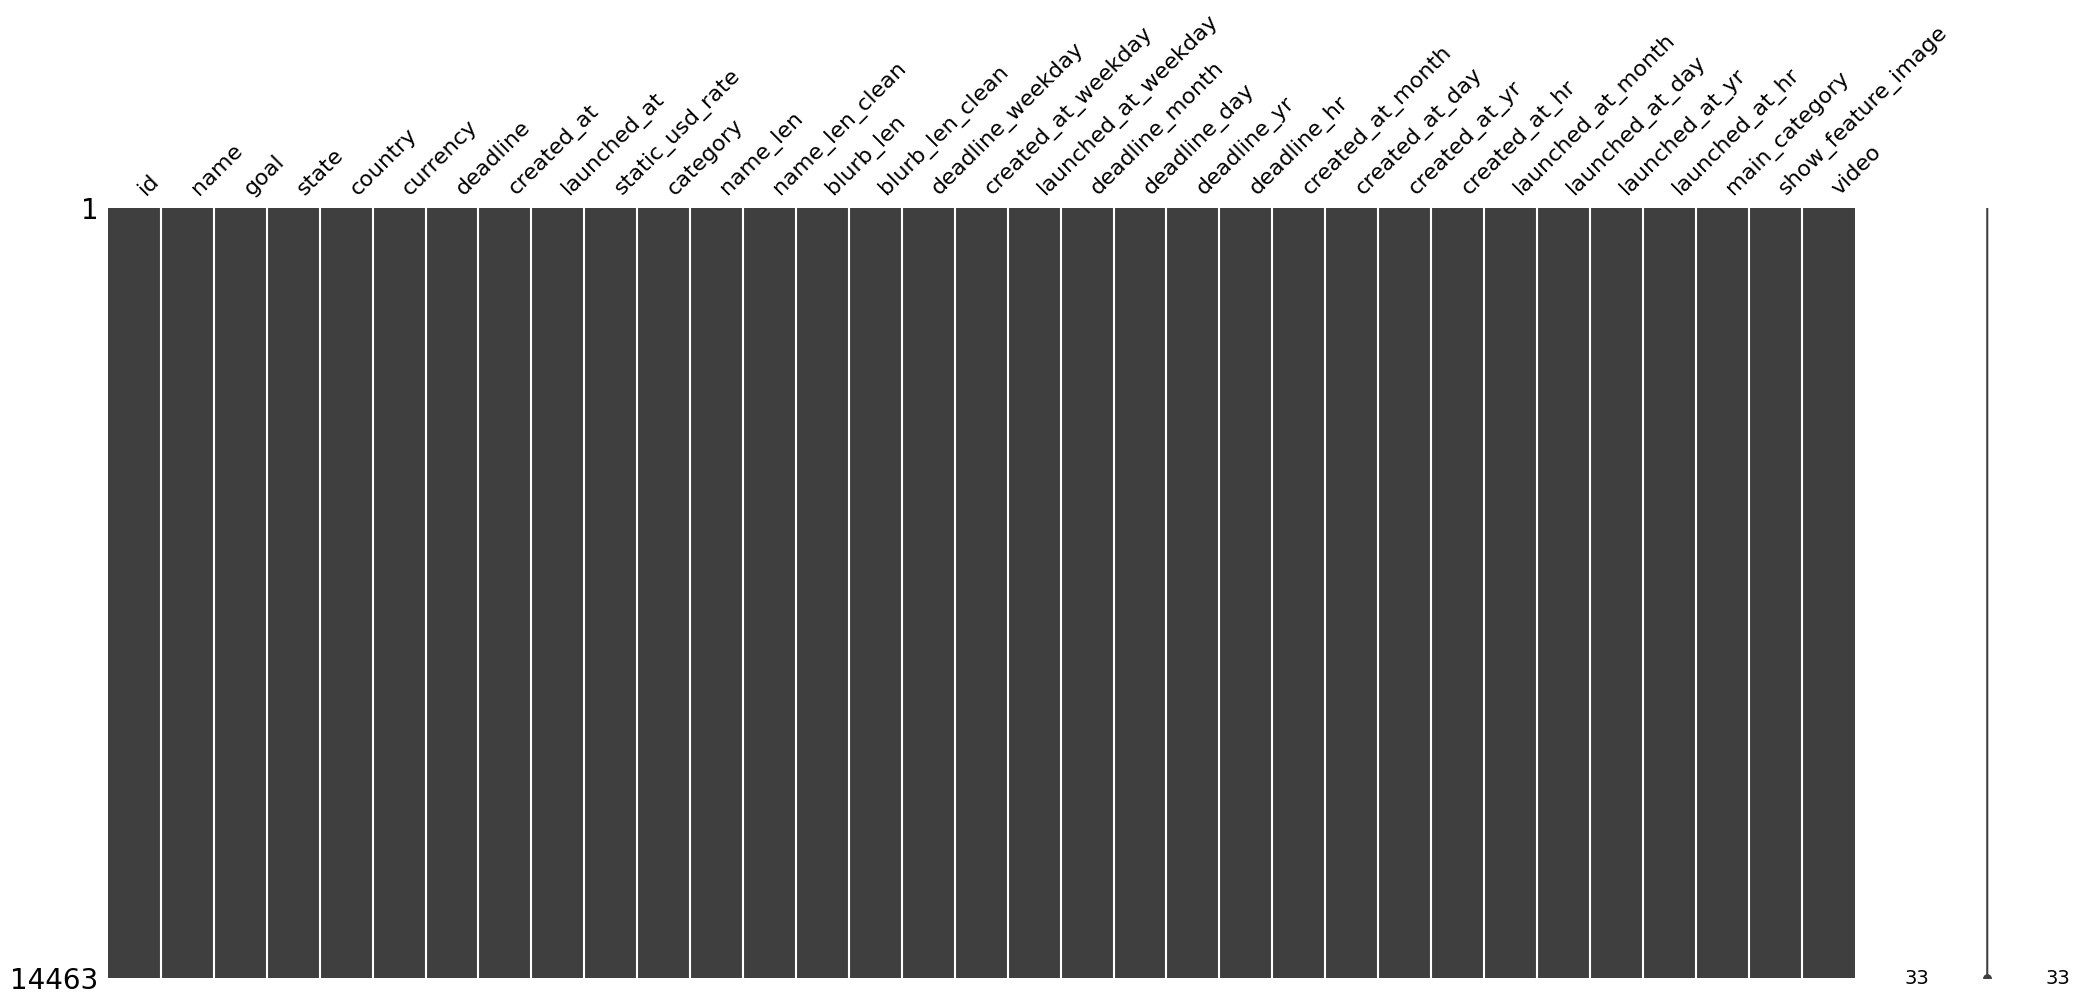

In [22]:
msno.matrix(result)

## 2. EDA

In [23]:
result.head(10)

id                                               name   goal  \
0   22292                          Golgotha - A Feature Film   5500   
1   82234                     Vinca is opening a storefront!  10000   
2   86478    The next Paul Jacobsen & The Madison Arm album!   8500   
3  127446                 Erin Heist First Full-Length Album   5000   
4  151612  Earth Day Heritage: A Celebration in Music and...  15000   
5  210595  Treadmill Trackstar's 25th Anniversary: Last S...   2000   
6  248081  The Power Hour Radio Show with Bob Powers & Pa...   5000   
7  270724     Computer Vision Mastery for Professionals 2023   2500   
8  313985  Hymns From Home Instrumental Album from Bethan...   5000   
9  323425                             Famous Dogs of Science    500   

        state country currency            deadline          created_at  \
0  successful      US      USD 2017-07-09 04:59:00 2011-02-01 23:25:17   
1  successful      US      USD 2018-10-25 14:29:30 2012-02-28 21:10:07   
2  successful      US      USD 2019-05-05 16:37:46 2012-03-01 22:06:25   
3  successful      US      USD 2021-11-25 21:00:14 2012-04-03 22:44:17   
4      failed      US      USD 2021-04-15 21:22:00 2012-04-20 21:06:46   
5  successful      US      USD 2017-10-03 12:14:49 2012-06-01 18:35:12   
6      failed      US      USD 2019-08-19 16:00:00 2012-07-03 08:25:12   
7  successful      US      USD 2023-04-29 09:54:25 2012-07-19 20:05:31   
8  successful      US      USD 2020-07-10 04:59:00 2012-08-22 22:46:42   
9  successful      US      USD 2019-10-24 04:00:00 2012-08-30 16:38:21   

          launched_at  static_usd_rate         category  name_len  \
0 2017-06-03 16:05:54              1.0        Thrillers         4   
1 2018-09-25 14:29:30              1.0          Jewelry         5   
2 2019-04-05 16:37:46              1.0   Country & Folk         8   
3 2021-10-26 20:00:14              1.0   Country & Folk         5   
4 2021-03-15 19:42:17              1.0  Classical Music        10   
5 2017-08-15 12:14:49              1.0             Rock         7   
6 2019-06-25 10:50:52              1.0            Audio        10   
7 2023-03-24 09:54:25              1.0         Software         6   
8 2020-06-09 01:27:54              1.0            Faith         8   
9 2019-09-18 12:00:38              1.0   Graphic Design         4   

   name_len_clean  blurb_len  blurb_len_clean deadline_weekday  \
0               3         22               20           Sunday   
1               4         25               23         Thursday   
2               6         16               13           Sunday   
3               5         15               14         Thursday   
4               9         19               18         Thursday   
5               7         20               20          Tuesday   
6               9         16               16           Monday   
7               6         16               16         Saturday   
8               8         13               12           Friday   
9               4         16               14         Thursday   

  created_at_weekday launched_at_weekday  deadline_month  deadline_day  \
0            Tuesday            Saturday               7             9   
1            Tuesday             Tuesday              10            25   
2           Thursday              Friday               5             5   
3            Tuesday             Tuesday              11            25   
4             Friday              Monday               4            15   
5             Friday             Tuesday              10             3   
6            Tuesday             Tuesday               8            19   
7           Thursday              Friday               4            29   
8          Wednesday             Tuesday               7            10   
9           Thursday           Wednesday              10            24   

   deadline_yr  deadline_hr  created_at_month  created_at_day  created_at_yr  \
0         2017            4 

In [24]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 15214
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   14463 non-null  int64         
 1   name                 14463 non-null  object        
 2   goal                 14463 non-null  int64         
 3   state                14463 non-null  object        
 4   country              14463 non-null  object        
 5   currency             14463 non-null  object        
 6   deadline             14463 non-null  datetime64[ns]
 7   created_at           14463 non-null  datetime64[ns]
 8   launched_at          14463 non-null  datetime64[ns]
 9   static_usd_rate      14463 non-null  float64       
 10  category             14463 non-null  object        
 11  name_len             14463 non-null  int64         
 12  name_len_clean       14463 non-null  int64         
 13  blurb_len            14463 non-null 

### Dropping Id and name since they are not useful for our analysis.

In [25]:
result = result.drop(columns=['id','name'], axis=1)

## EDA: Numerical Variables
### Let's analyze the numerical variables first.

In [26]:
num_variables = result.select_dtypes(include=['number'])
num_variables.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 15214
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   goal               14463 non-null  int64  
 1   static_usd_rate    14463 non-null  float64
 2   name_len           14463 non-null  int64  
 3   name_len_clean     14463 non-null  int64  
 4   blurb_len          14463 non-null  int64  
 5   blurb_len_clean    14463 non-null  int64  
 6   deadline_month     14463 non-null  int64  
 7   deadline_day       14463 non-null  int64  
 8   deadline_yr        14463 non-null  int64  
 9   deadline_hr        14463 non-null  int64  
 10  created_at_month   14463 non-null  int64  
 11  created_at_day     14463 non-null  int64  
 12  created_at_yr      14463 non-null  int64  
 13  created_at_hr      14463 non-null  int64  
 14  launched_at_month  14463 non-null  int64  
 15  launched_at_day    14463 non-null  int64  
 16  launched_at_yr     14463 no

### Let's plot a correlation matrix to see if there are any strong relationship between the variables. For now, we are not including the target variable in the correlation matrix since, the target is a binary variable (successful or failed), so the relationship between the target in the other numerical will never be linear. That is why, it is not included in this particular correlation matrix analysis.

### We are using the correlation matrix to see if there are variables that represent the same information (possible collinearity).

In [27]:
correlation_matrix = num_variables.corr()


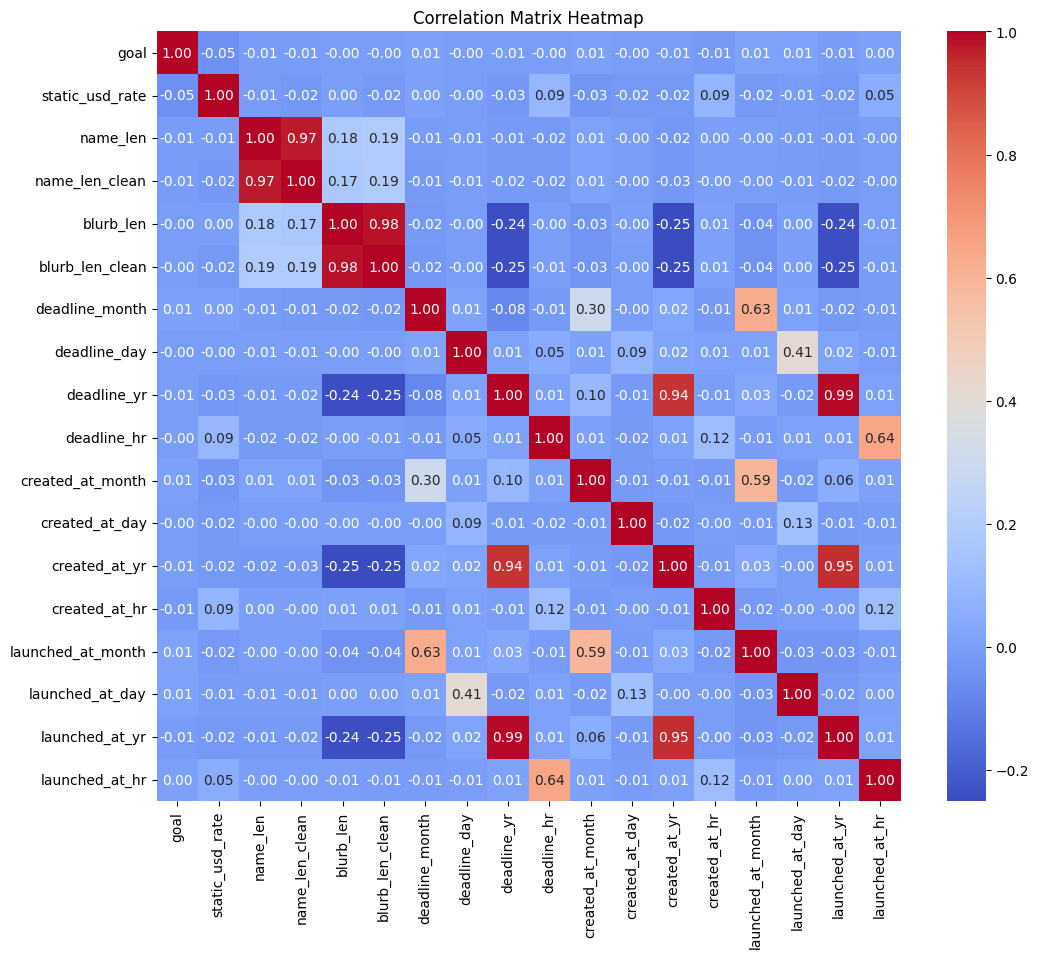

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Variables related to the year: it seems like the year of creation change and year of launch date is highly correlated to the year of the project deadline. This make sense since it means the project has been created and launched the very closely to the deadline year of the project.

#### Variables related to the month: similar behavior for the month but with lower correlation.
#### Variables related to the hour: similar behavior for the hour but lower correlation.

### Let's continue analyzing the numerical variables per target group (successful and failed). This will help us understand if there are any differences between each target per variable.

In [29]:
num_variables = num_variables.join(result['state'])

In [30]:
num_variables.describe()

goal  static_usd_rate      name_len  name_len_clean  \
count  1.446300e+04     14463.000000  14463.000000    14463.000000   
mean   6.917525e+04         0.970111      5.375786        5.004356   
std    1.601474e+06         0.274833      2.459302        2.280234   
min    1.000000e+00         0.006722      1.000000        1.000000   
25%    1.500000e+03         1.000000      3.000000        3.000000   
50%    5.000000e+03         1.000000      5.000000        5.000000   
75%    1.500000e+04         1.000000      7.000000        7.000000   
max    1.000000e+08         1.433585     16.000000       14.000000   

          blurb_len  blurb_len_clean  deadline_month  deadline_day  \
count  14463.000000     14463.000000    14463.000000  14463.000000   
mean      16.312176        14.975731        6.591855     15.398396   
std        5.866888         5.456764        3.387704      9.189595   
min        1.000000         1.000000        1.000000      1.000000   
25%       12.000000        11.000000        4.000000      7.000000   
50%       17.000000        16.000000        6.000000     15.000000   
75%       21.000000        19.000000       10.000000     23.000000   
max       31.000000        28.000000       12.000000     31.000000   

        deadline_yr   deadline_hr  created_at_month  created_at_day  \
count  14463.000000  14463.000000      14463.000000    14463.000000   
mean    2019.583005     12.722326          6.330637       15.532877   
std        1.903278      6.908788          3.448967        8.791560   
min     2017.000000      0.000000          1.000000        1.000000   
25%     2018.000000      6.000000          3.000000        8.000000   
50%     2020.000000     14.000000          6.000000       15.000000   
75%     2021.000000     18.000000          9.000000       23.000000   
max     2024.000000     23.000000         12.000000       31.000000   

       created_at_yr  created_at_hr  launched_at_month  launched_at_day  \
count   14463.000000   14463.000000       14463.000000     14463.000000   
mean     2019.331259      13.173546           6.272419        15.175413   
std         1.890663       6.945311           3.406237         8.959149   
min      2011.000000       0.000000           1.000000         1.000000   
25%      2018.000000       8.000000           3.000000         7.000000   
50%      2019.000000      15.000000           6.000000        15.000000   
75%      2021.000000      19.000000           9.000000        23.000000   
max      2022.000000      23.000000          12.000000        31.000000   

       launched_at_yr  launched_at_hr  
count     14463.00000    14463.000000  
mean       2019.51732       13.464496  
std           1.88864        6.400281  
min        2017.00000        0.000000  
25%        2018.00000        9.000000  
50%        2019.00000       15.000000  
75%        2021.00000       18.000000  
max        2024.00000       23.000000

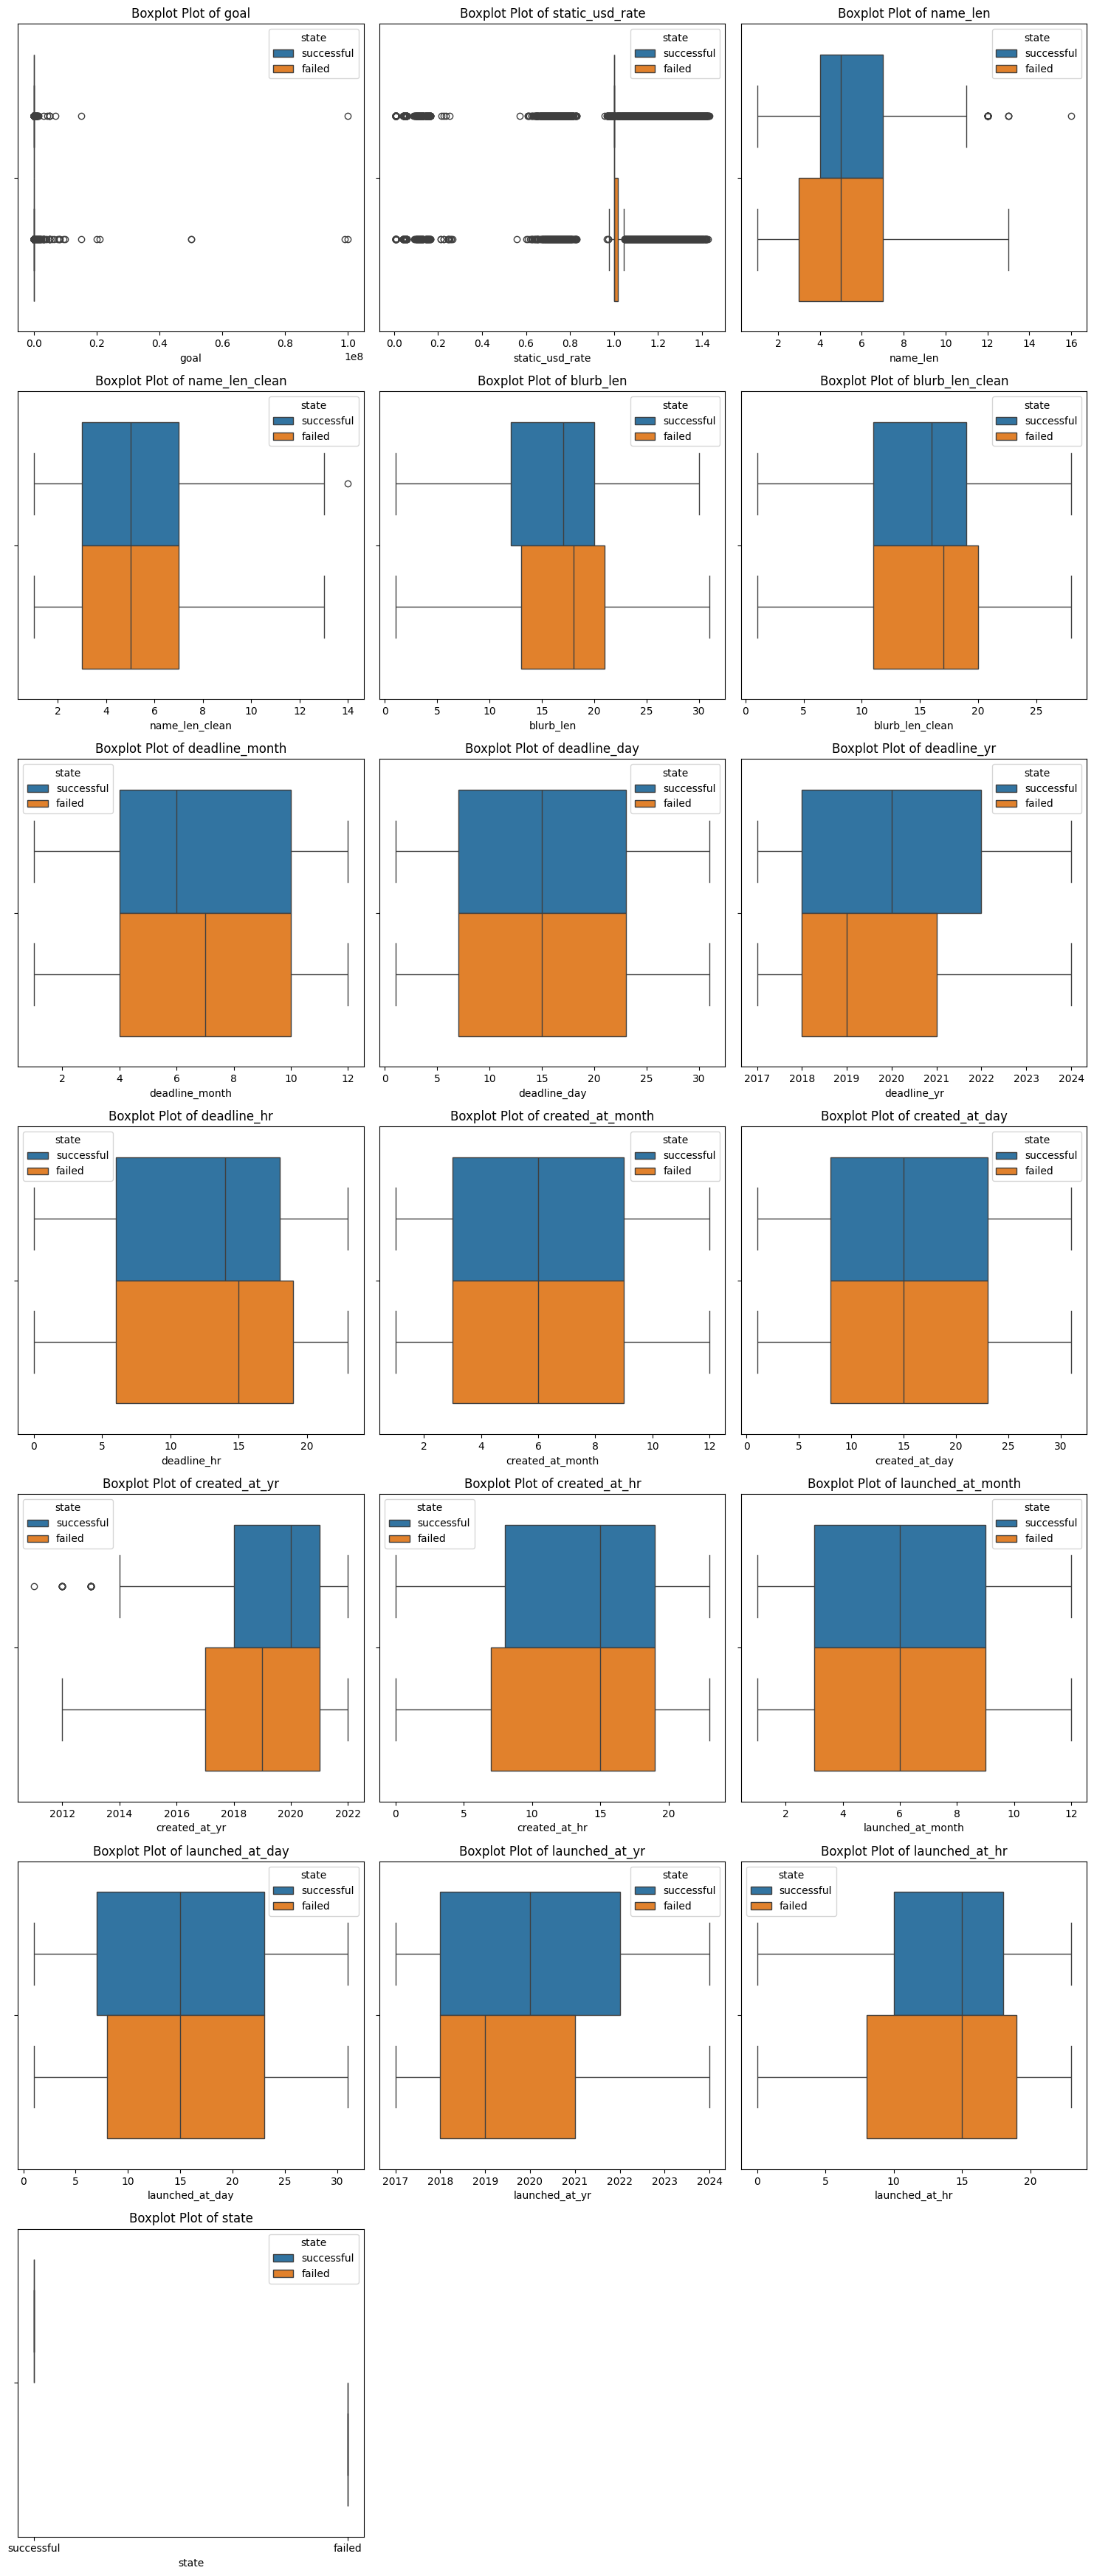

In [31]:
num_vars = num_variables.shape[1]
cols = 3
rows = (num_vars + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(num_variables.columns):
    sns.boxplot(data=num_variables, x=col, ax=axes[i], hue=num_variables['state'])
    axes[i].set_title(f'Boxplot Plot of {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### It seems like variables like the blurb_len, blurb_len_clean, deadline_month, deadline_yr, deadline_hr, created_at_yr and launched_at_yr are the ones that are showing differences between the projects that have been successfull and the ones that have failed since the mean in the boxplots shows to be different and as well as the distribution per target group.

## EDA Categorical variables:

### Now, let's analyze the categorical variables

### So far, we have in the original data some categorical variables like video, but since the country has some many categories and that can generate noise in our future models, let's try to reduce the number of categories by creating a new variables called 'Continent' based on the 'Country' variable.

In [32]:
country_codes = result['country'].unique().tolist()

In [33]:
# Mapping of country codes to continent names
continent_mapping = {
    'US': 'North America', 'GB': 'Europe', 'CA': 'North America', 'CO': 'South America',
    'ES': 'Europe', 'LB': 'Asia', 'JM': 'North America', 'IT': 'Europe', 'NL': 'Europe',
    'DK': 'Europe', 'DE': 'Europe', 'SE': 'Europe', 'FR': 'Europe', 'SJ': 'Europe',
    'HN': 'North America', 'LU': 'Europe', 'PL': 'Europe', 'AU': 'Oceania',
    'CR': 'North America', 'IE': 'Europe', 'AT': 'Europe', 'CH': 'Europe',
    'RU': 'Asia', 'MA': 'Africa', 'IR': 'Asia', 'MX': 'North America',
    'SG': 'Asia', 'BE': 'Europe', 'NZ': 'Oceania', 'TH': 'Asia',
    'HK': 'Asia', 'JP': 'Asia', 'PR': 'North America', 'PE': 'South America',
    'IL': 'Asia', 'NO': 'Europe', 'CU': 'North America', 'SV': 'North America',
    'PH': 'Asia', 'ZA': 'Africa', 'IN': 'Asia', 'ID': 'Asia',
    'VE': 'South America', 'NP': 'Asia', 'GR': 'Europe', 'CZ': 'Europe',
    'SK': 'Europe', 'NG': 'Africa', 'VN': 'Asia', 'TZ': 'Africa',
    'KR': 'Asia', 'IQ': 'Asia', 'UA': 'Europe', 'AR': 'South America',
    'BT': 'Asia', 'SN': 'Africa', 'TW': 'Asia', 'LK': 'Asia',
    'CN': 'Asia', 'CK': 'Oceania', 'HR': 'Europe', 'IS': 'Europe',
    'SL': 'Africa', 'RO': 'Europe', 'RW': 'Africa', 'GH': 'Africa',
    'UG': 'Africa', 'HU': 'Europe', 'KE': 'Africa', 'PT': 'Europe',
    'BA': 'Europe', 'NI': 'North America', 'TR': 'Asia', 'BG': 'Europe',
    'ET': 'Africa', 'RS': 'Europe', 'GT': 'North America', 'AF': 'Asia',
    'CD': 'Africa', 'WS': 'Oceania', 'CY': 'Europe', 'FI': 'Europe',
    'FM': 'Oceania', 'BO': 'South America', 'CG': 'Africa', 'SI': 'Europe',
    'SR': 'South America', 'AO': 'Africa', 'PK': 'Asia', 'AM': 'Asia',
    'EC': 'South America', 'AZ': 'Asia', 'MW': 'Africa', 'AE': 'Asia',
    'EE': 'Europe', 'MN': 'Asia', 'DZ': 'Africa', 'BS': 'North America',
    'MY': 'Asia', 'LT': 'Europe', 'BR': 'South America', 'GU': 'Oceania',
    'PA': 'North America', 'MM': 'Asia', 'GE': 'Asia', 'MT': 'Europe',
    'MO': 'Asia', 'BD': 'Asia', 'CL': 'South America', 'KG': 'Asia',
    'LV': 'Europe', 'ML': 'Africa', 'QA': 'Asia', 'TV': 'Oceania',
    'SD': 'Africa'
}

df = pd.DataFrame({'Country Code': country_codes})
df['Continent'] = df['Country Code'].map(continent_mapping)

In [34]:
#Creating new variable 'Continent' based on the 'country' using the dictionary continent_mapping
result['Continent'] = result['country'].map(continent_mapping)

In [35]:
#Filtering only categorical variables
categorical_vars = result.select_dtypes(include=['object', 'bool']).columns

### Now, let's make some visualization of the categorical variables with Bar Charts

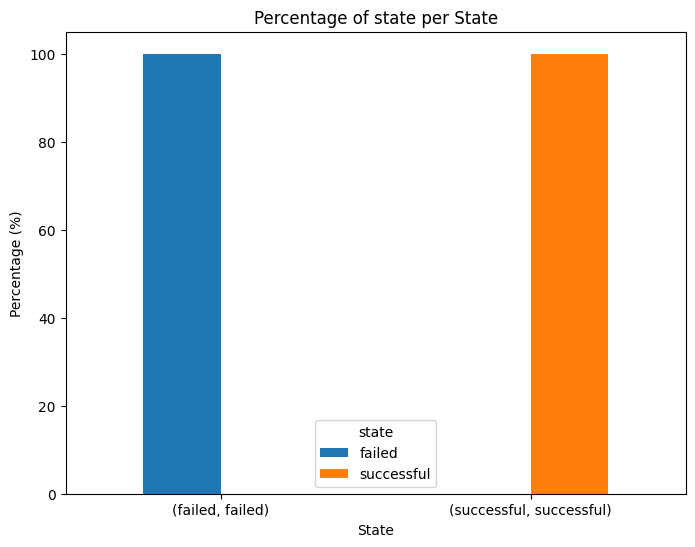

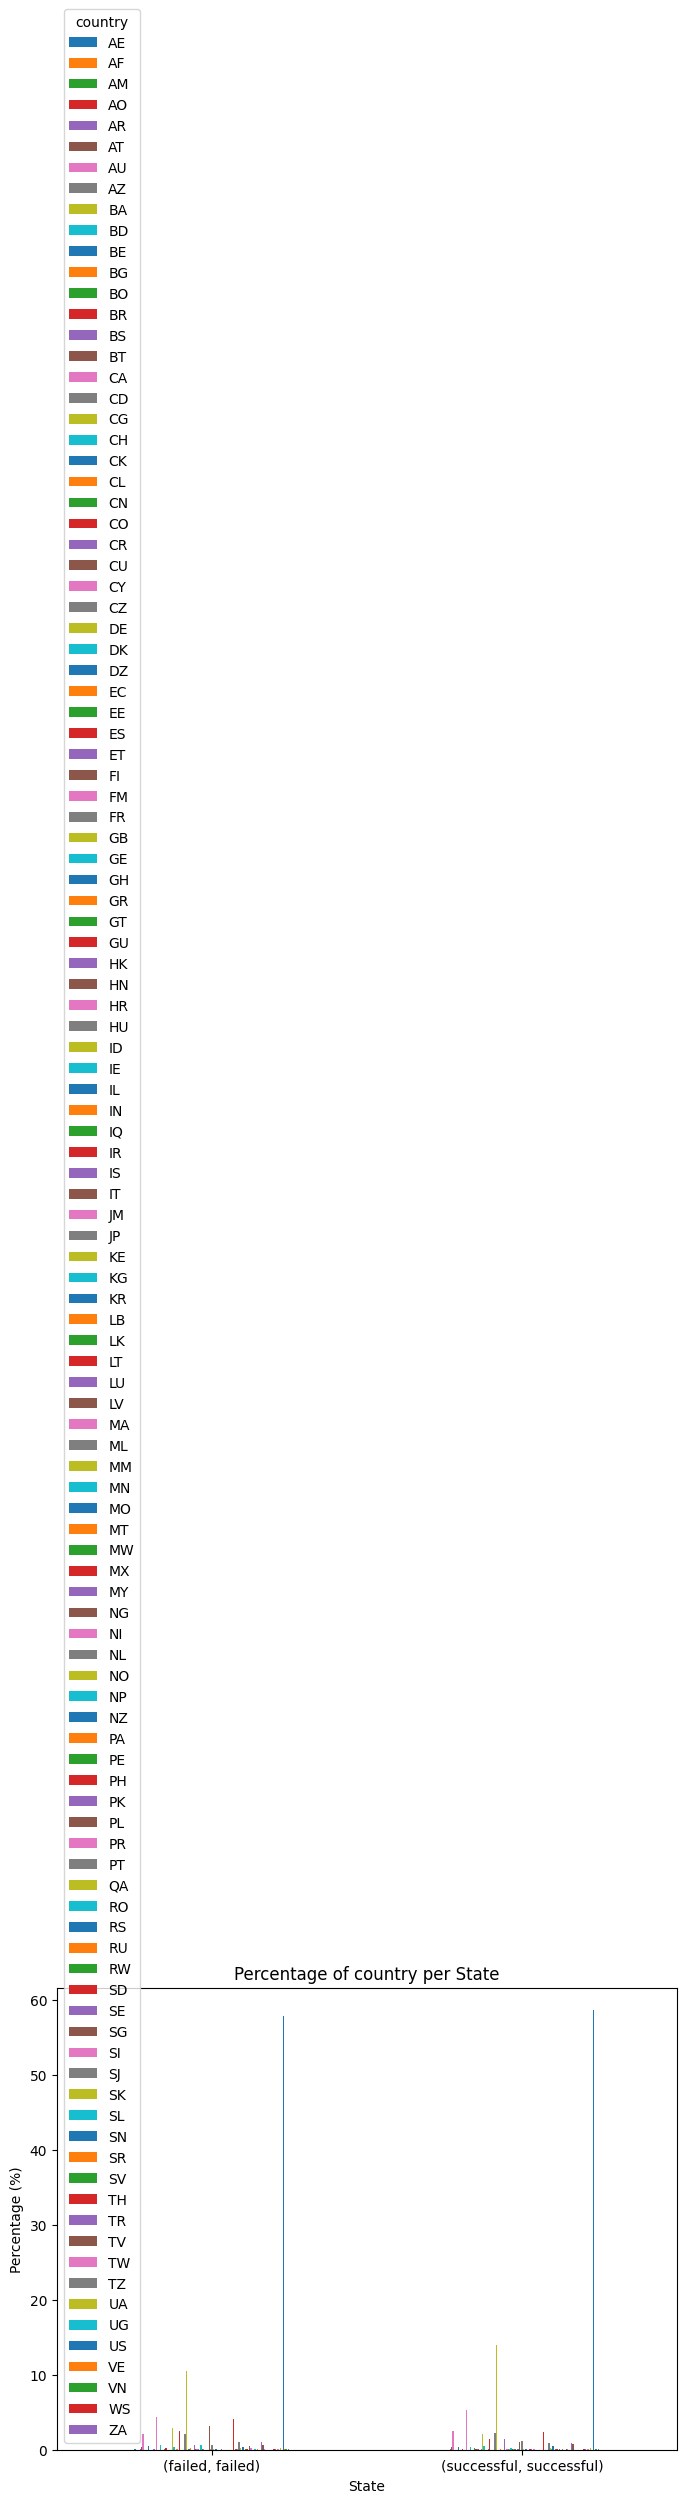

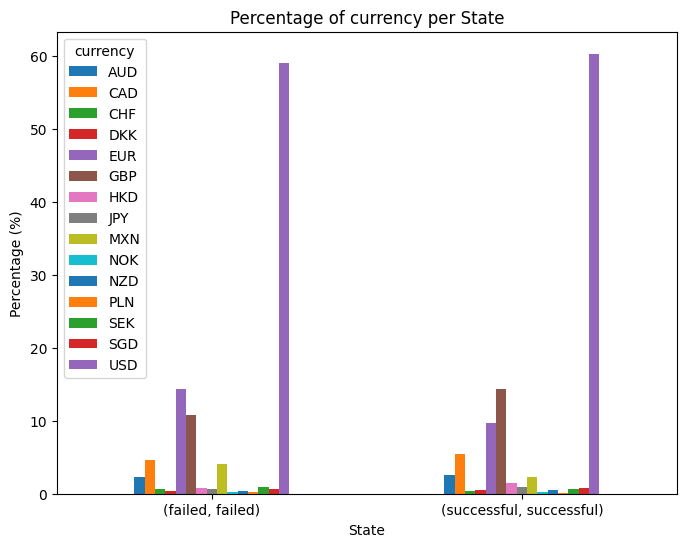

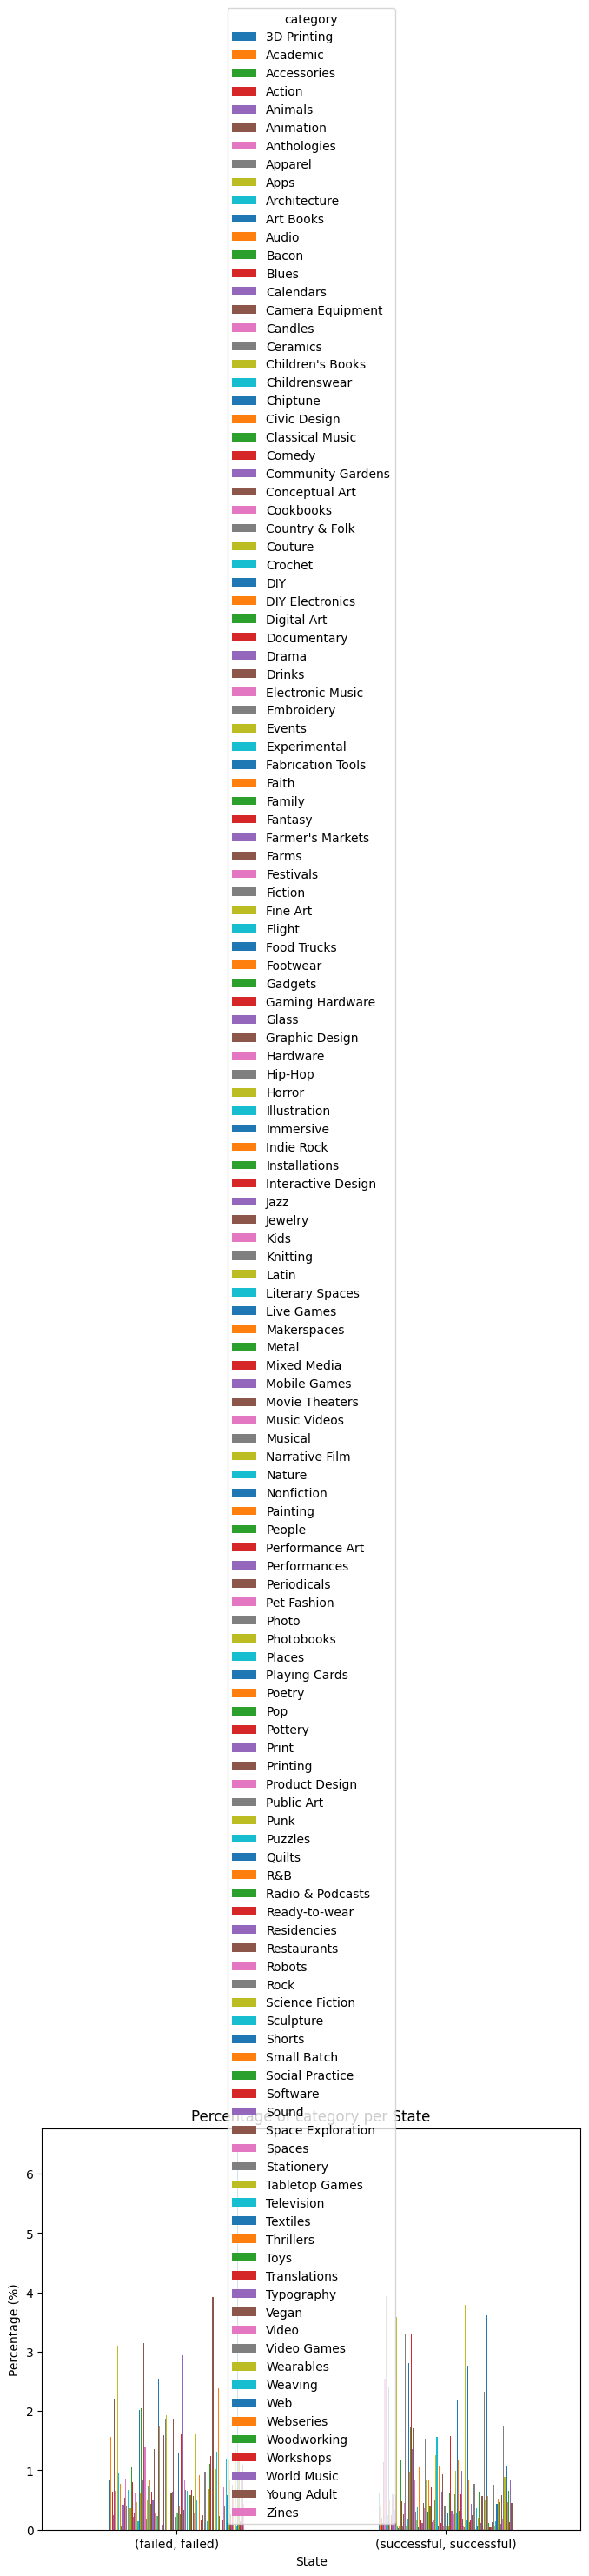

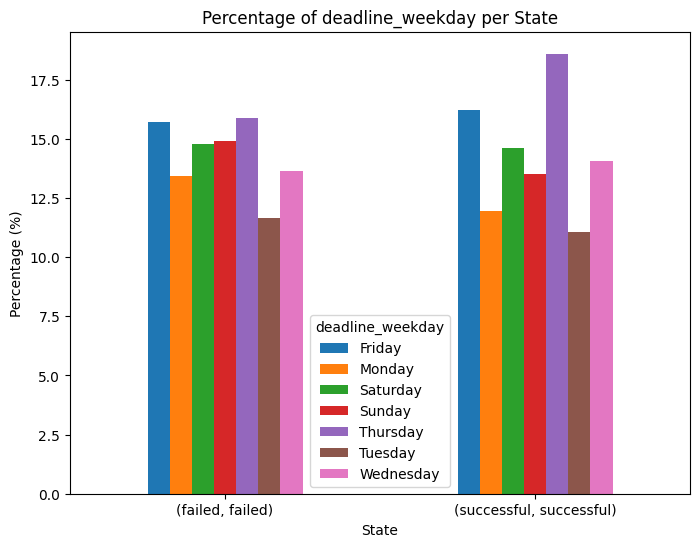

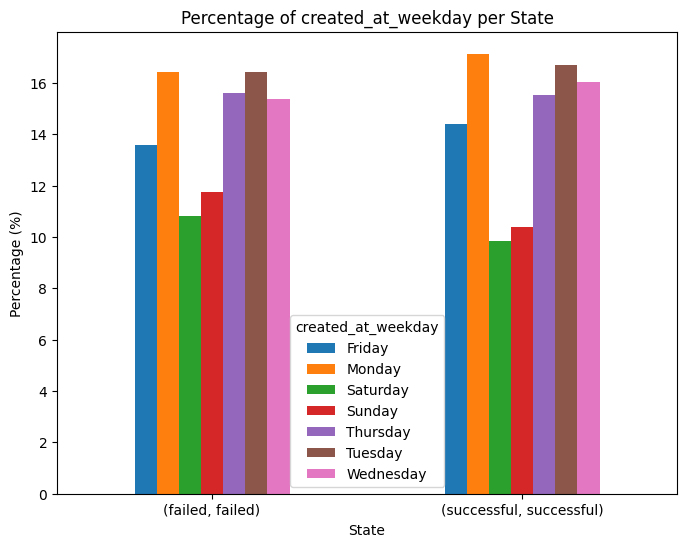

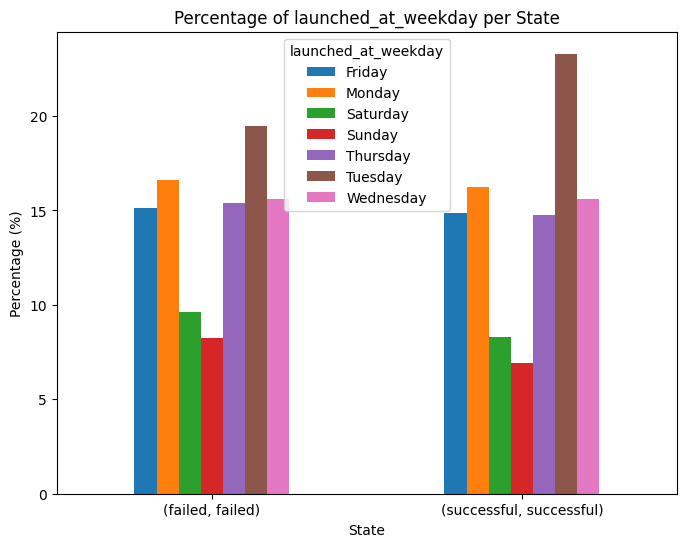

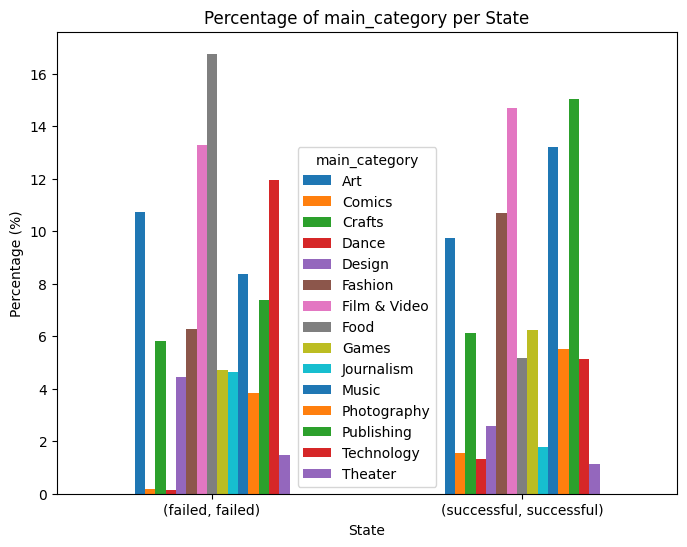

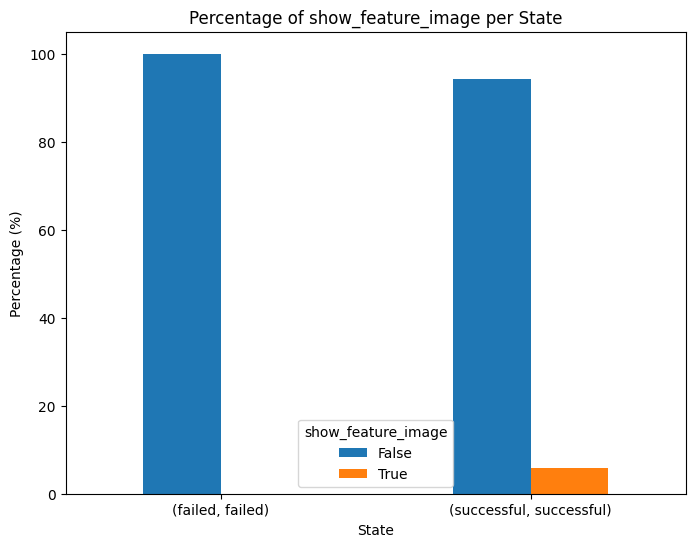

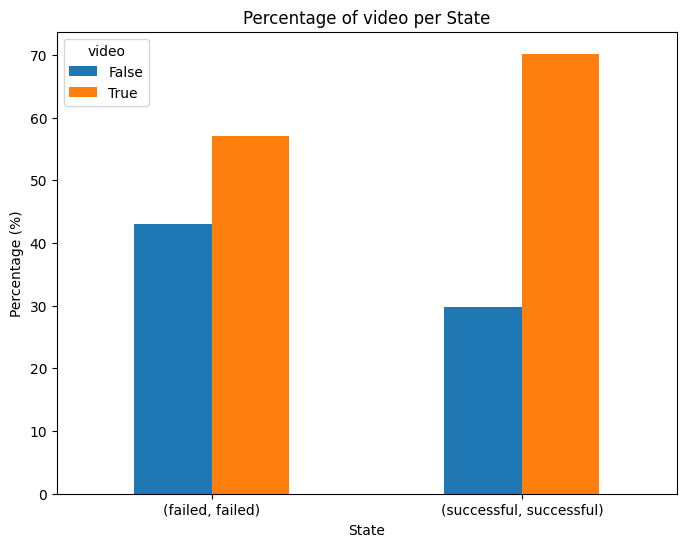

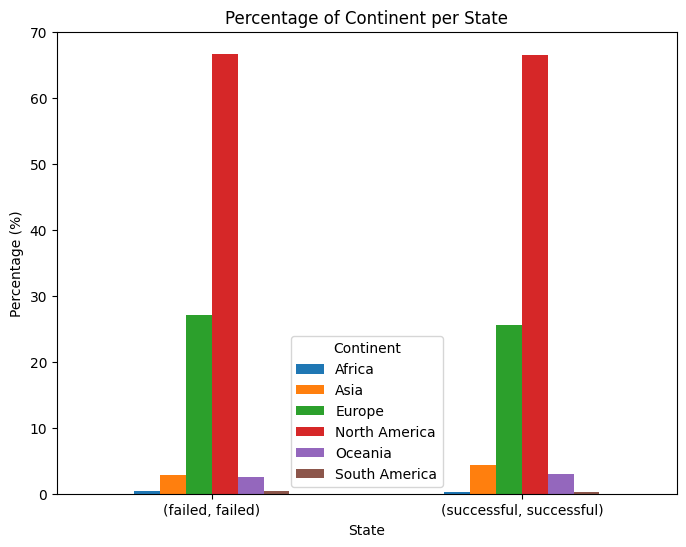

In [36]:
for var in categorical_vars:
    grouped_percentages = (
        result.groupby(['state', var]).size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
        .unstack(fill_value=0)
    )

    grouped_percentages.plot(kind='bar', figsize=(8, 6))
    plt.title(f'Percentage of {var} per State')
    plt.ylabel('Percentage (%)')
    plt.xlabel('State')
    plt.xticks(rotation=0)
    plt.legend(title=var)

In [37]:
grouped_percentages = (
        result.groupby(['state', 'currency']).size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
        .unstack(fill_value=0)
    )
grouped_percentages

currency                    AUD       CAD       CHF       DKK        EUR  \
state      state                                                           
failed     failed      2.241492  4.646597  0.670812  0.425393  14.381545   
successful successful  2.526644  5.448449  0.407137  0.502934   9.627590   

currency                     GBP       HKD       JPY       MXN       NOK  \
state      state                                                           
failed     failed      10.798429  0.752618  0.621728  4.090314  0.196335   
successful successful  14.273740  1.472877  0.922045  2.347024  0.215543   

currency                    NZD       PLN       SEK       SGD        USD  
state      state                                                          
failed     failed      0.425393  0.196335  0.965314  0.589005  58.998691  
successful successful  0.455035  0.047898  0.706502  0.802299  60.244282

#### Currency: there is a higher percentage of failed projects (14.38%) that were created using EUR as currency. However, there is a higher rate of successful projects (14.27%) that were created using GBP as currency. Also, there is a slightly higher rate of of successful projects (60.24%) that were created using USD as currency but higher percentage of failed projects (4.09%) that were created using MXN as currency.

In [38]:
grouped_percentages = (
        result.groupby(['state', 'deadline_weekday']).size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
        .unstack(fill_value=0)
    )
grouped_percentages

deadline_weekday          Friday     Monday   Saturday     Sunday   Thursday  \
state      state                                                               
failed     failed      15.706806  13.448953  14.774215  14.888743  15.886780   
successful successful  16.237576  11.938690  14.632978  13.495390  18.596575   

deadline_weekday         Tuesday  Wednesday  
state      state                             
failed     failed      11.665576  13.628927  
successful successful  11.052569  14.046222

#### Deadline_Weekday: sucessful project might be the ones that have a weekday of deadline on Thursday, Friday, and Wednesday. Failed projects might be that have a weekday of deadline on Monday.

In [39]:
grouped_percentages = (
        result.groupby(['state', 'launched_at_weekday']).size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
        .unstack(fill_value=0)
    )
grouped_percentages

launched_at_weekday       Friday     Monday  Saturday    Sunday   Thursday  \
state      state                                                             
failed     failed      15.117801  16.590314  9.604058  8.229712  15.395942   
successful successful  14.848521  16.261526  8.298407  6.933301  14.752724   

launched_at_weekday      Tuesday  Wednesday  
state      state                             
failed     failed      19.469895  15.592277  
successful successful  23.302598  15.602922

#### launched_at_weekday: sucessful project might be the ones that have been launched on Tuesday and failed projects on Friday, Saturday and Sunday.

In [40]:
grouped_percentages = (
        result.groupby(['state', 'main_category']).size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
        .unstack(fill_value=0)
    )
grouped_percentages

main_category                Art    Comics    Crafts     Dance    Design  \
state      state                                                           
failed     failed      10.716623  0.179974  5.808246  0.147251  4.450262   
successful successful   9.747336  1.556700  6.107053  1.329182  2.586517   

main_category            Fashion  Film & Video       Food     Games  \
state      state                                                      
failed     failed       6.266361     13.285340  16.753927  4.728403   
successful successful  10.705305     14.704826   5.185008  6.250748   

main_category          Journalism      Music  Photography  Publishing  \
state      state                                                        
failed     failed        4.646597   8.360602     3.828534    7.395288   
successful successful    1.796192  13.219974     5.508322   15.016166   

main_category          Technology   Theater  
state      state                             
failed     failed       11.943717  1.488874  
successful successful    5.137109  1.149563

### Main_Category: projects related to Art, Design , Food, Journalism and Technology tend to fail more. However, projects related to Fashion, Film & Video, Games, Music, Phothography and Publishing, tend to succeed more.

In [41]:
grouped_percentages = (
        result.groupby(['state', 'show_feature_image']).size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
        .unstack(fill_value=0)
    )
grouped_percentages

show_feature_image          False     True 
state      state                           
failed     failed      100.000000  0.000000
successful successful   94.228236  5.771764

#### show_feature_image: it is more likely that the project fail when an image of the product in the project description is not included.

In [42]:
grouped_percentages = (
        result.groupby(['state', 'video']).size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
        .unstack(fill_value=0)
    )
grouped_percentages

video                      False      True 
state      state                           
failed     failed      42.997382  57.002618
successful successful  29.792839  70.207161

#### Video: if the project description includes a video, it is more likely that the project succeed than if it is not included.

In [43]:
grouped_percentages = (
        result.groupby(['state', 'Continent']).size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
        .unstack(fill_value=0)
    )
grouped_percentages

Continent                Africa      Asia     Europe  North America   Oceania  \
state      state                                                                
failed     failed      0.343586  2.863220  27.159686      66.704843  2.552356   
successful successful  0.311340  4.394683  25.601724      66.507005  2.921806   

Continent              South America  
state      state                      
failed     failed           0.376309  
successful successful       0.263442

### Continent (new variable): projects made in Europe and Asia tend to fail more compared to other continents.

### For now we only have used a Filter Method based on the visualization behaviour of the groups per each variable, to understand which features should be included in the predictive classification model, to see if a new project will be successful or not.

### Conclusion: Based on the EDA, the variables that should be included in the model should be the following:
### blurb_len, blurb_len_clean, deadline_month, deadline_yr, deadline_hr, created_at_yr and launched_at_yr (numerical variables)
### currency, deadline_weekday, launched_at_weekday, main_catergory, show_feature_image video and continent. (categorical variables)
### This because these variables show significant differences between the projects that have been successful from the ones that have failed.
### The rest of the variables does not show significant differences between the two target groups, so they will not be included in the model.



In [44]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 15214
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   goal                 14463 non-null  int64         
 1   state                14463 non-null  object        
 2   country              14463 non-null  object        
 3   currency             14463 non-null  object        
 4   deadline             14463 non-null  datetime64[ns]
 5   created_at           14463 non-null  datetime64[ns]
 6   launched_at          14463 non-null  datetime64[ns]
 7   static_usd_rate      14463 non-null  float64       
 8   category             14463 non-null  object        
 9   name_len             14463 non-null  int64         
 10  name_len_clean       14463 non-null  int64         
 11  blurb_len            14463 non-null  int64         
 12  blurb_len_clean      14463 non-null  int64         
 13  deadline_weekday     14463 non-null 

In [45]:
data_to_use = result.drop(columns=['goal','country','deadline','created_at','launched_at','static_usd_rate',
                                   'name_len','name_len_clean','created_at_weekday', 'deadline_day','created_at_month','created_at_day',
                                   'created_at_hr', 'launched_at_month','launched_at_day', 'launched_at_hr'],
                          axis=1)
data_to_use.head(10)

state currency         category  blurb_len  blurb_len_clean  \
0  successful      USD        Thrillers         22               20   
1  successful      USD          Jewelry         25               23   
2  successful      USD   Country & Folk         16               13   
3  successful      USD   Country & Folk         15               14   
4      failed      USD  Classical Music         19               18   
5  successful      USD             Rock         20               20   
6      failed      USD            Audio         16               16   
7  successful      USD         Software         16               16   
8  successful      USD            Faith         13               12   
9  successful      USD   Graphic Design         16               14   

  deadline_weekday launched_at_weekday  deadline_month  deadline_yr  \
0           Sunday            Saturday               7         2017   
1         Thursday             Tuesday              10         2018   
2           Sunday              Friday               5         2019   
3         Thursday             Tuesday              11         2021   
4         Thursday              Monday               4         2021   
5          Tuesday             Tuesday              10         2017   
6           Monday             Tuesday               8         2019   
7         Saturday              Friday               4         2023   
8           Friday             Tuesday               7         2020   
9         Thursday           Wednesday              10         2019   

   deadline_hr  created_at_yr  launched_at_yr main_category  \
0            4           2011            2017  Film & Video   
1           14           2012            2018       Fashion   
2           16           2012            2019         Music   
3           21           2012            2021         Music   
4           21           2012            2021         Music   
5           12           2012            2017         Music   
6           16           2012            2019    Journalism   
7            9           2012            2023    Technology   
8            4           2012            2020         Music   
9            4           2012            2019        Design   

   show_feature_image  video      Continent  
0               False   True  North America  
1               False   True  North America  
2               False   True  North America  
3               False   True  North America  
4               False   True  North America  
5               False   True  North America  
6               False   True  North America  
7               False   True  North America  
8               False   True  North America  
9               False  False  North America

In [46]:
data_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 15214
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   state                14463 non-null  object
 1   currency             14463 non-null  object
 2   category             14463 non-null  object
 3   blurb_len            14463 non-null  int64 
 4   blurb_len_clean      14463 non-null  int64 
 5   deadline_weekday     14463 non-null  object
 6   launched_at_weekday  14463 non-null  object
 7   deadline_month       14463 non-null  int64 
 8   deadline_yr          14463 non-null  int64 
 9   deadline_hr          14463 non-null  int64 
 10  created_at_yr        14463 non-null  int64 
 11  launched_at_yr       14463 non-null  int64 
 12  main_category        14463 non-null  object
 13  show_feature_image   14463 non-null  bool  
 14  video                14463 non-null  bool  
 15  Continent            14463 non-null  object
dtypes: bool(2

In [47]:
data_to_use['state'] = data_to_use['state'].apply(lambda x: 1 if x == 'successful' else 0)

### Modeling:

### Let's dummify, split and standardize the data first.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

#Dummyfing
y=data_to_use['state']
X=data_to_use.drop(columns=['state'], axis=1)
X=pd.get_dummies(X, drop_first=True)

#Split data using 30% for testing set and 70% for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Standarize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Now, let's start with a Random Forest Model

In [49]:
#Random Forest
rf = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=5, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest")
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=20, n_estimators=100; total time=   1.2s
[CV] END .....................max_depth=20, n_estimators=100; total time=   1.2s
[CV] END .....................max_depth=20, n_estimators=100; total time=   1.1s
[CV] END .....................max_depth=20, n_estimators=100; total time=   1.1s
[CV] END .....................max_depth=20, n_estimators=100; total time=   1.1s
[CV] END .....................max_depth=20, n_estimators=200; total time=   2.3s
[CV] END .....................max_depth=20, n_estimators=200; total time=   3.3s
[CV] END .....................max_depth=20, n_estimators=200; total time=   3.0s
[CV] END .....................max_depth=20, n_estimators=200; total time=   2.3s
[CV] END .....................max_depth=20, n_estimators=200; total time=   2.2s
[CV] END .....................max_depth=30, n_estimators=100; total time=   1.4s
[CV] END .....................max_depth=30, n_est

### Now, let's build a Logistic Regression Model

LogisticRegression
Accuracy: 0.7494814473380963
              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1854
           1       0.80      0.75      0.78      2485

    accuracy                           0.75      4339
   macro avg       0.75      0.75      0.75      4339
weighted avg       0.75      0.75      0.75      4339

[[1379  475]
 [ 612 1873]]


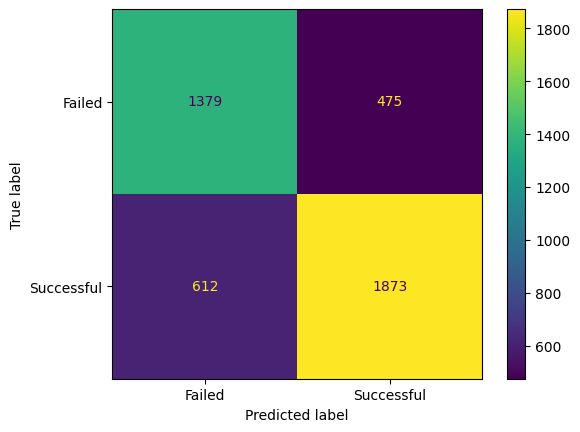

In [50]:
#Logistic Regression
lr = LogisticRegression(solver='liblinear', max_iter=100)

lr.fit(X_train, y_train)


# Get predicted probabilities
probabilities = lr.predict_proba(X_test)

# Adjust the threshold
threshold = 0.5
predictions = (probabilities[:, 1] >= threshold).astype(int)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)
print("LogisticRegression")
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
custom_labels = ['Failed', 'Successful']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=custom_labels)
disp.plot()

### Comparing the performance of both models (Random Forest vs. Logistic Regression), Logistic Regression performs sligthly better and more stable in terms of Accuracy (75%), Precision (80%) and Recall (75%). Hence, with the higher precision and accuracy of the Logistic Regression Model, this ensures that when a project is classified as "successful," it is likely to actually succeed. Also, high precision ensures the recommendations are reliable, improving user satisfaction and trust.

In [51]:
selected_model = lr.fit(X_train, y_train)
selected_model

LogisticRegression(solver='liblinear')

In [52]:
# Extract coefficients and intercept
coefficients = lr.coef_[0]
intercept = lr.intercept_[0]

# Print results
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Combine coefficients with feature names
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)

Coefficients: [-3.00357900e-01  2.09246390e-01 -9.38856878e-02 -9.67496625e-01
 -2.05469993e-03 -3.28076053e-02  1.18305821e+00  1.20015786e+00
  3.10720891e-01  2.38511536e-01  3.10913370e-02  1.06012927e-01
  1.42507560e-01  3.89915206e-01  7.23138255e-02  6.70809797e-02
  7.84721293e-02  1.77935203e-02  1.13153633e-02 -4.00139068e-02
  7.19390517e-02  8.16780547e-02  5.02711415e-01 -2.21763549e-01
  7.59755975e-01 -2.44034965e-01 -7.27072178e-02 -4.25794666e-01
 -3.28238781e-02  7.12098755e-01 -1.74134013e-01 -1.25394490e-01
  6.93359148e-01 -1.04980831e-01 -1.23172010e-01 -1.97207195e-02
 -3.43089749e-02  4.37082428e-02 -1.05234415e-01 -6.36937823e-02
  8.02610839e-01 -2.56937717e-01  7.26431223e-02 -8.84071742e-02
 -9.78786579e-02 -1.61520231e-01 -3.50264023e-02 -7.15344987e-02
 -1.09313026e-02  7.90609276e-01 -1.97501506e-01  9.12284880e-03
 -2.42414084e-02  6.03051049e-02 -1.45489794e-01  5.88425291e-01
 -2.35388078e-01 -5.48237344e-02 -1.52733755e-01  4.65204006e-04
 -5.6114775

### Finally, let's build a function that contains all the pre-processing steps for the prediction of the state of a new project.

In [65]:
def pre_process(kick_df):

    kick_df = kick_df.drop(columns=['pledged','disable_communication', 'state_changed_at', 'staff_pick',
                                'backers_count','usd_pledged','spotlight','staff_pick','state_changed_at_month',
                                'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'state_changed_at_weekday','staff_pick.1'])
    states = ['successful','failed']
    kick_df = kick_df[kick_df['state'].isin(states)]

    rows_with_missing = kick_df[kick_df.isnull().any(axis=1)]
    rows_with_missing = rows_with_missing.filter(items=['main_category','state','category'])

    df_main_categories = kick_df.filter(items=['main_category','state','category'])
    subcategory_counts = df_main_categories.groupby(['main_category','category']).size().reset_index(name='counts')
    max_subcategory_counts = subcategory_counts.loc[subcategory_counts.groupby('main_category')['counts'].idxmax()]

    rows_with_missing['main_category'] = rows_with_missing['main_category'].fillna(rows_with_missing['category'])
    for index, row in max_subcategory_counts.iterrows():
        main_category = row['main_category']
        category = row['category']
        rows_with_missing.loc[
            rows_with_missing['main_category'] == main_category, 'category'
        ] = category

    kick_df_copy = kick_df.copy()
    result = kick_df_copy.join(rows_with_missing, how='left', rsuffix='_df2')

    for index, row in result.iterrows():
        if pd.isna(row['main_category']):
            result.at[index, 'main_category'] = row['main_category_df2']
            result.at[index, 'category'] = row['category_df2']

    result = result.drop(columns=['main_category_df2','category_df2','state_df2'], axis=1)

    result = result.drop(columns=['id','name'], axis=1)

    country_codes = result['country'].unique().tolist()

    # Mapping of country codes to continent names
    continent_mapping = {
        'US': 'North America', 'GB': 'Europe', 'CA': 'North America', 'CO': 'South America',
        'ES': 'Europe', 'LB': 'Asia', 'JM': 'North America', 'IT': 'Europe', 'NL': 'Europe',
        'DK': 'Europe', 'DE': 'Europe', 'SE': 'Europe', 'FR': 'Europe', 'SJ': 'Europe',
        'HN': 'North America', 'LU': 'Europe', 'PL': 'Europe', 'AU': 'Oceania',
        'CR': 'North America', 'IE': 'Europe', 'AT': 'Europe', 'CH': 'Europe',
        'RU': 'Asia', 'MA': 'Africa', 'IR': 'Asia', 'MX': 'North America',
        'SG': 'Asia', 'BE': 'Europe', 'NZ': 'Oceania', 'TH': 'Asia',
        'HK': 'Asia', 'JP': 'Asia', 'PR': 'North America', 'PE': 'South America',
        'IL': 'Asia', 'NO': 'Europe', 'CU': 'North America', 'SV': 'North America',
        'PH': 'Asia', 'ZA': 'Africa', 'IN': 'Asia', 'ID': 'Asia',
        'VE': 'South America', 'NP': 'Asia', 'GR': 'Europe', 'CZ': 'Europe',
        'SK': 'Europe', 'NG': 'Africa', 'VN': 'Asia', 'TZ': 'Africa',
        'KR': 'Asia', 'IQ': 'Asia', 'UA': 'Europe', 'AR': 'South America',
        'BT': 'Asia', 'SN': 'Africa', 'TW': 'Asia', 'LK': 'Asia',
        'CN': 'Asia', 'CK': 'Oceania', 'HR': 'Europe', 'IS': 'Europe',
        'SL': 'Africa', 'RO': 'Europe', 'RW': 'Africa', 'GH': 'Africa',
        'UG': 'Africa', 'HU': 'Europe', 'KE': 'Africa', 'PT': 'Europe',
        'BA': 'Europe', 'NI': 'North America', 'TR': 'Asia', 'BG': 'Europe',
        'ET': 'Africa', 'RS': 'Europe', 'GT': 'North America', 'AF': 'Asia',
        'CD': 'Africa', 'WS': 'Oceania', 'CY': 'Europe', 'FI': 'Europe',
        'FM': 'Oceania', 'BO': 'South America', 'CG': 'Africa', 'SI': 'Europe',
        'SR': 'South America', 'AO': 'Africa', 'PK': 'Asia', 'AM': 'Asia',
        'EC': 'South America', 'AZ': 'Asia', 'MW': 'Africa', 'AE': 'Asia',
        'EE': 'Europe', 'MN': 'Asia', 'DZ': 'Africa', 'BS': 'North America',
        'MY': 'Asia', 'LT': 'Europe', 'BR': 'South America', 'GU': 'Oceania',
        'PA': 'North America', 'MM': 'Asia', 'GE': 'Asia', 'MT': 'Europe',
        'MO': 'Asia', 'BD': 'Asia', 'CL': 'South America', 'KG': 'Asia',
        'LV': 'Europe', 'ML': 'Africa', 'QA': 'Asia', 'TV': 'Oceania',
        'SD': 'Africa'
    }

    df = pd.DataFrame({'Country Code': country_codes})
    df['Continent'] = df['Country Code'].map(continent_mapping)

    result['Continent'] = result['country'].map(continent_mapping)

    data_to_use = result.drop(columns=['goal','country','deadline','created_at','launched_at','static_usd_rate',
                                   'name_len','name_len_clean','created_at_weekday', 'deadline_day','created_at_month','created_at_day',
                                   'created_at_hr', 'launched_at_month','launched_at_day', 'launched_at_hr'],
                          axis=1)

    data_to_use['state'] = data_to_use['state'].apply(lambda x: 1 if x == 'successful' else 0)

    y=data_to_use['state']
    X=data_to_use.drop(columns=['state'], axis=1)
    X=pd.get_dummies(X, drop_first=True)

    #Standarize
    scaler = StandardScaler()
    X_grading = scaler.fit_transform(X)

    return (X_grading, y)

In [ ]:
## Grading ##

# Import Grading Data
kickstarter_grading_df = pd.read_excel("Kickstarter-Grading.xlsx") #Kickstarter-Grading.xlsx

# Pre-Process Grading Data
kickstarter_grading_df = kickstarter_grading_df.dropna()

# Setup the variables
X_grading, y_grading = pre_process(kickstarter_grading_df)

# Apply the model previously trained to the grading data
y_grading_pred = selected_model.predict(X_grading)

# Calculate the accuracy score
accuracy_score(y_grading, y_grading_pred)

0.7579132886852309

## PART 2: Clustering Model

#### Now, let's build a Cluster Model using K-Prototype since we have a mixed dataset with both numerical and categorical variables. But, first let's try to understand how many clusters should be developed using the Elbow method.



In [57]:
pip install kmodes

ncluster 1
ncluster 2
ncluster 3
ncluster 4


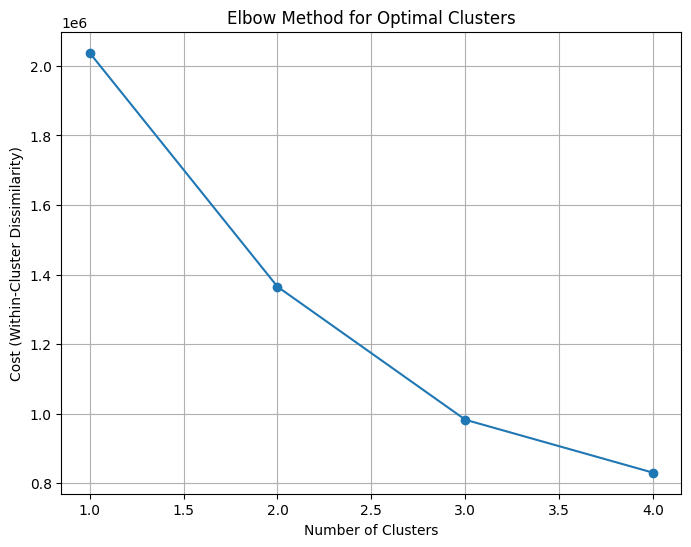

In [59]:
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder

# Prepare data (example)
data_to_use2 = data_to_use.copy()
data_to_use2 = data_to_use2.drop(columns=['state'],axis=1)
categorical_vars2 = data_to_use2.select_dtypes(include=['object'])

# Encode categorical variables
for col in categorical_vars2:
    data_to_use2[col] = LabelEncoder().fit_transform(data_to_use2[col])

# Prepare data for k-prototype
X = data_to_use2.values
categorical_indices = [data_to_use2.columns.get_loc(col) for col in categorical_vars2]

# Compute costs for different numbers of clusters
costs = []
range_n_clusters = range(1, 5)  # Test 1 to 6 clusters

for n_clusters in range_n_clusters:
    kproto = KPrototypes(n_clusters=n_clusters, init='Huang')
    kproto.fit_predict(X, categorical=categorical_indices)
    costs.append(kproto.cost_)
    print('ncluster', n_clusters)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, costs, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost (Within-Cluster Dissimilarity)')
plt.grid()
plt.show()


### It seems like the elbow is number of clusters = 3 or number of clusters = 4. Now, let's use the Silhouette score to understand how strong is the cohesion between the clusters.

### Number of clusters = 3

In [62]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

# Convert categorical columns to index-based representation
data_to_use2 = data_to_use.copy()
data_to_use2 = data_to_use2.drop(columns=['state'],axis=1)
categorical_vars2 = data_to_use2.select_dtypes(include=['object'])
for col in categorical_vars2:
    data_to_use2[col] = data_to_use2[col].astype('category')

# Prepare data for k-prototype
X = data_to_use2.values
categorical_indices = [data_to_use2.columns.get_loc(col) for col in categorical_vars2]

# Apply K-Prototypes
kproto = KPrototypes(n_clusters=3, init='Huang', verbose=1)
clusters = kproto.fit_predict(X, categorical=categorical_indices)

# Add cluster labels to the dataframe
data_to_use2['Cluster'] = clusters

# Calculate silhouette score
# Combine numerical and encoded categorical data
numerical_cols = data_to_use2.select_dtypes(include=['int64', 'float64']).columns.difference(['Cluster'])
numerical_data = data_to_use2[numerical_cols].values

# Silhouette score
silhouette_avg = silhouette_score(numerical_data, clusters, metric='euclidean')
print(f"Silhouette Score: {silhouette_avg}")

# Display centroids and clusters
print("Cluster Centroids:\n", kproto.cluster_centroids_)
print("Assigned Clusters:\n", clusters)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3251, ncost: 985951.1750057592
Run: 1, iteration: 2/100, moves: 560, ncost: 982976.4435118528
Run: 1, iteration: 3/100, moves: 132, ncost: 982675.693738798
Run: 1, iteration: 4/100, moves: 36, ncost: 982652.5992592066
Run: 1, iteration: 5/100, moves: 12, ncost: 982649.702728158
Run: 1, iteration: 6/100, moves: 3, ncost: 982649.4998465506
Run: 1, iteration: 7/100, moves: 0, ncost: 982649.4998465506
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2514, ncost: 1025918.7321882397
Run: 2, iteration: 2/100, moves: 1239, ncost: 993442.2830279749
Run: 2, iteration: 3/100, moves: 645, ncost: 985027.113502956
Run: 2, iteration: 4/100, moves: 305, ncost: 982999.9350575948
Run: 2, iteration: 5/100, moves: 130, ncost: 982721.3007810824
Run: 2, iteration: 6/100, moves: 33, ncost: 982696.9511343886
Run: 2, iteration: 7/100, m

### Now, let's try to visualize these Clusters using n_clusters = 3

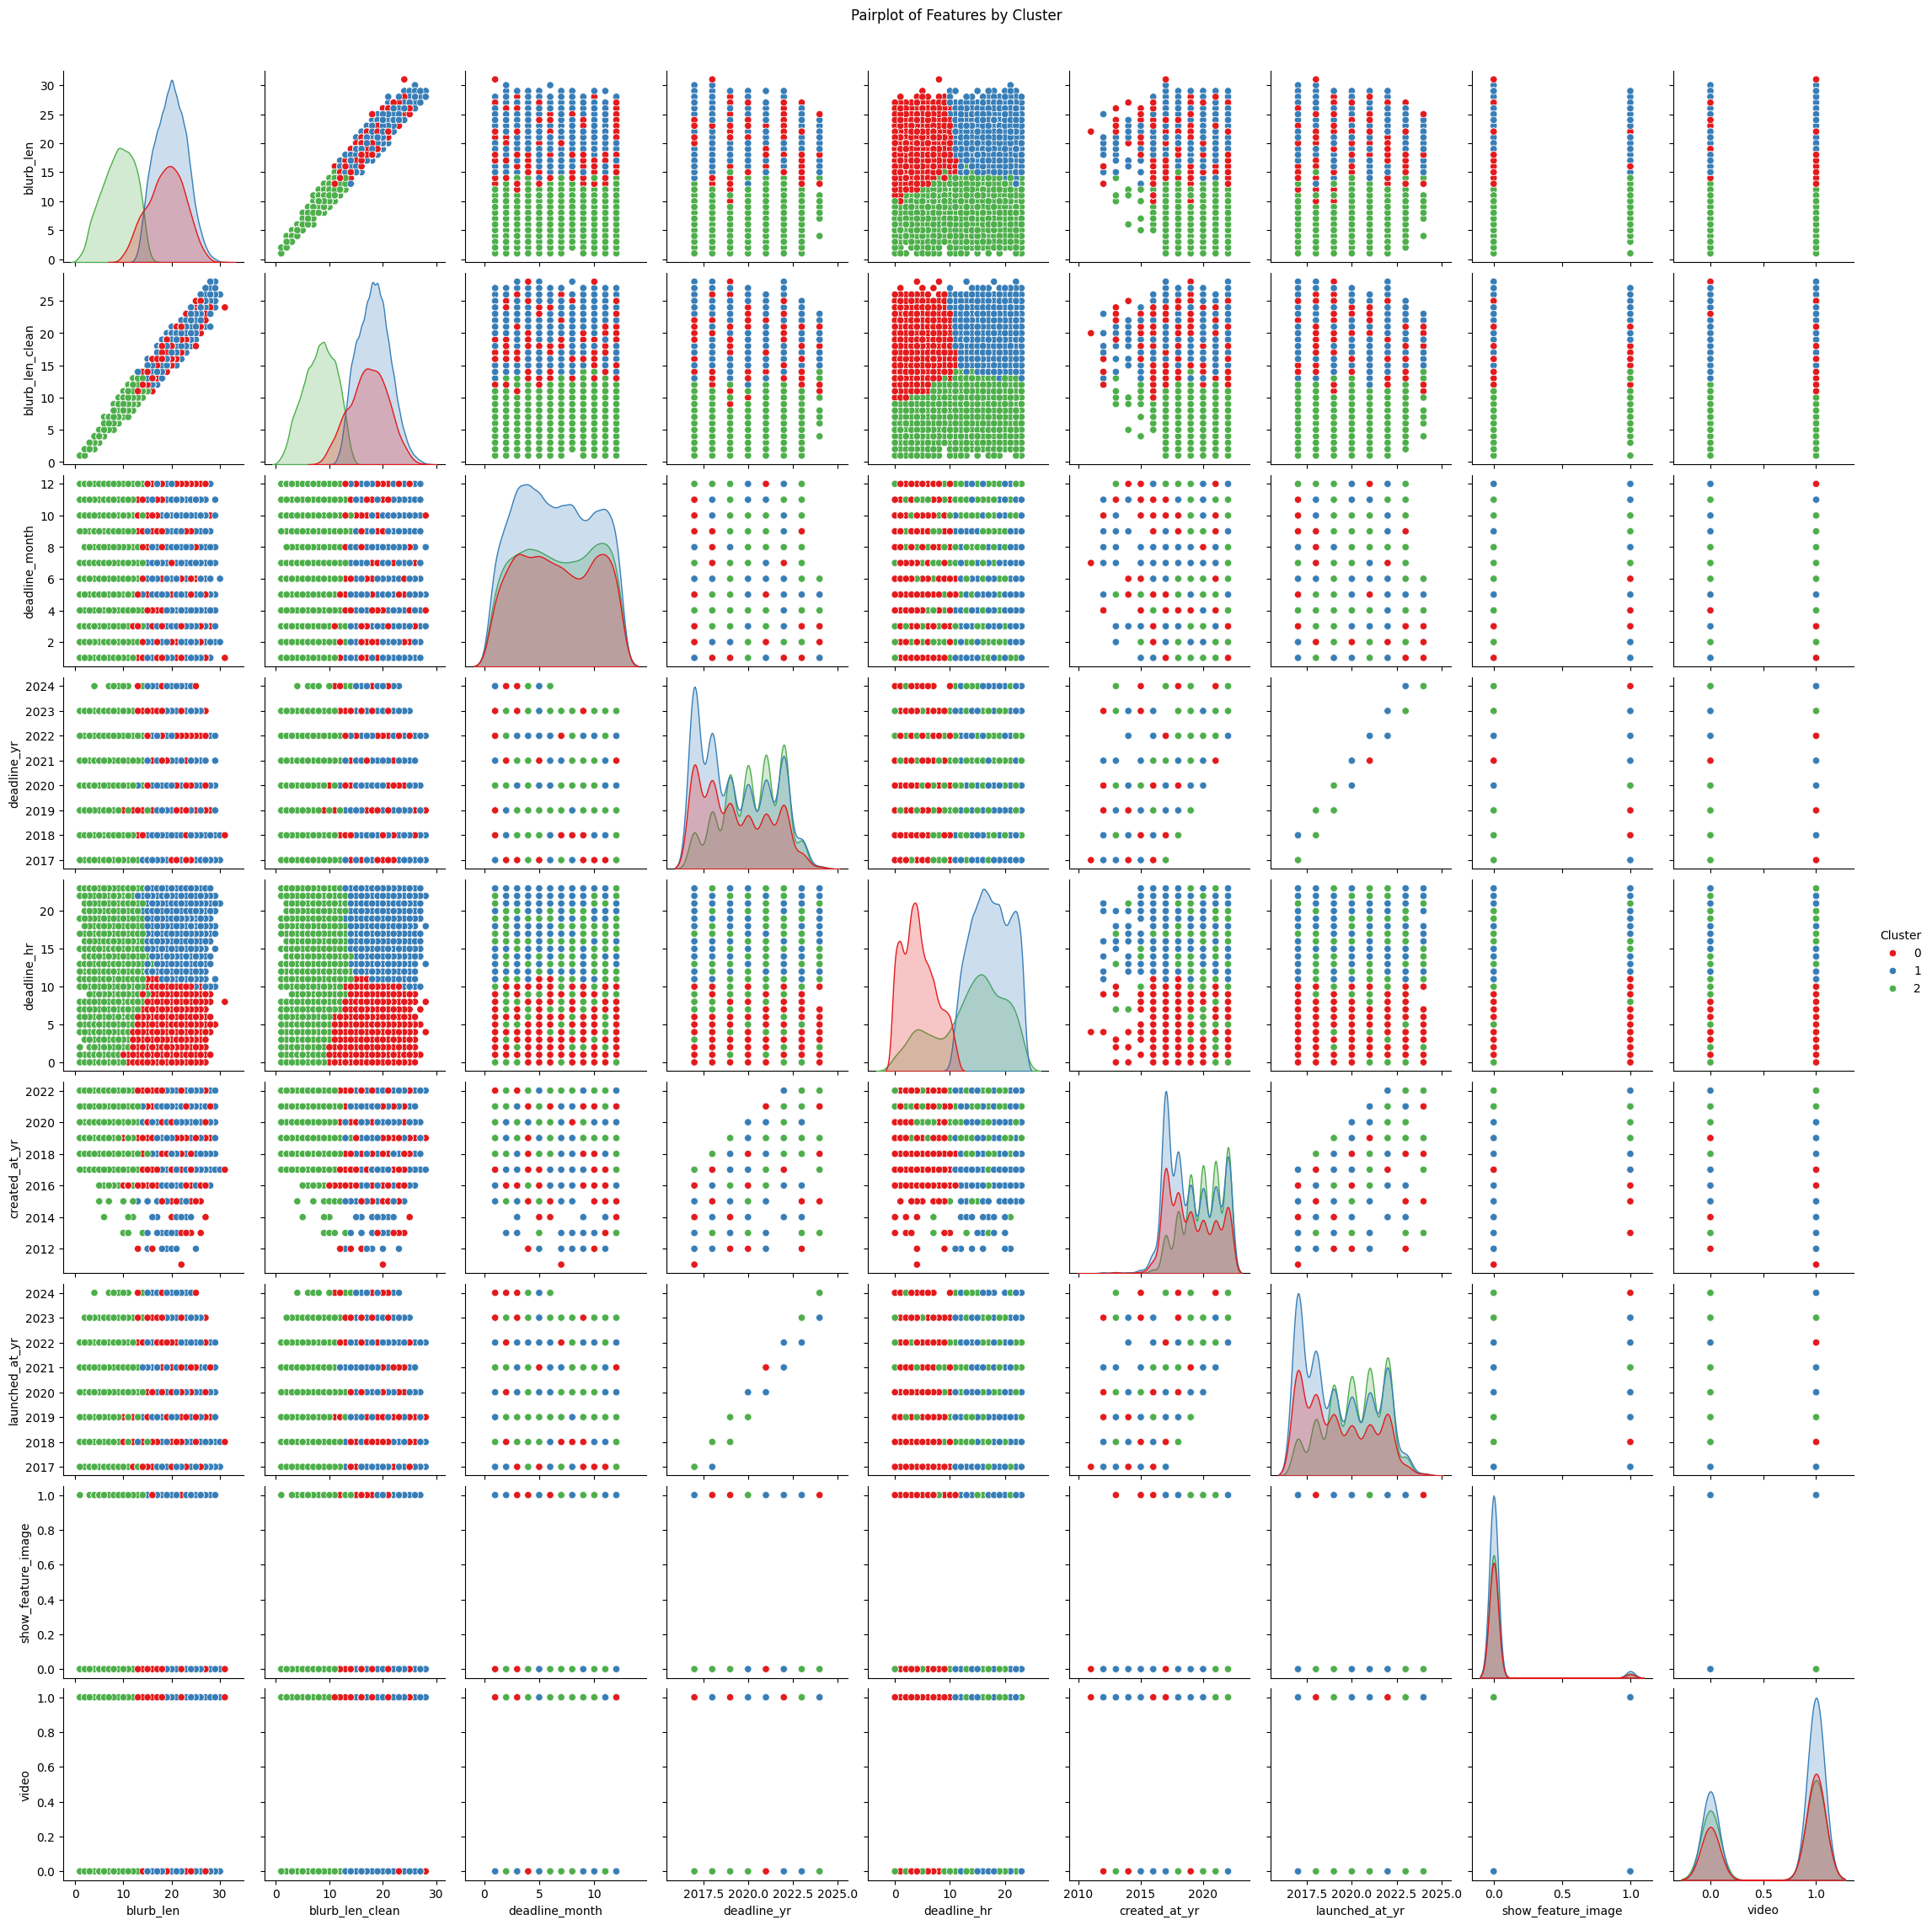

In [63]:
sns.pairplot(data_to_use2, hue='Cluster', diag_kind='kde', palette='Set1')
plt.suptitle('Pairplot of Features by Cluster', y=1.02)
plt.show()

### N_clusters = 4

In [64]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

# Convert categorical columns to index-based representation
data_to_use2 = data_to_use.copy()
data_to_use2 = data_to_use2.drop(columns=['state'],axis=1)
categorical_vars2 = data_to_use2.select_dtypes(include=['object'])
for col in categorical_vars2:
    data_to_use2[col] = data_to_use2[col].astype('category')

# Prepare data for k-prototype
X = data_to_use2.values
categorical_indices = [data_to_use2.columns.get_loc(col) for col in categorical_vars2]

# Apply K-Prototypes
kproto = KPrototypes(n_clusters=4, init='Huang', verbose=1)
clusters = kproto.fit_predict(X, categorical=categorical_indices)

# Add cluster labels to the dataframe
data_to_use2['Cluster'] = clusters

# Calculate silhouette score
# Combine numerical and encoded categorical data
numerical_cols = data_to_use2.select_dtypes(include=['int64', 'float64']).columns.difference(['Cluster'])
numerical_data = data_to_use2[numerical_cols].values

# Silhouette score
silhouette_avg = silhouette_score(numerical_data, clusters, metric='euclidean')
print(f"Silhouette Score: {silhouette_avg}")

# Display centroids and clusters
print("Cluster Centroids:\n", kproto.cluster_centroids_)
print("Assigned Clusters:\n", clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8890, ncost: 916296.8702786409
Run: 1, iteration: 2/100, moves: 1764, ncost: 884591.5144774829
Run: 1, iteration: 3/100, moves: 1027, ncost: 874403.3016623835
Run: 1, iteration: 4/100, moves: 494, ncost: 871875.1188077431
Run: 1, iteration: 5/100, moves: 326, ncost: 870363.5292858008
Run: 1, iteration: 6/100, moves: 275, ncost: 869046.9840655966
Run: 1, iteration: 7/100, moves: 375, ncost: 866629.5015846583
Run: 1, iteration: 8/100, moves: 374, ncost: 864019.3246572601
Run: 1, iteration: 9/100, moves: 444, ncost: 859713.6602219422
Run: 1, iteration: 10/100, moves: 569, ncost: 851322.5407136895
Run: 1, iteration: 11/100, moves: 744, ncost: 839458.6311034026
Run: 1, iteration: 12/100, moves: 570, ncost: 833066.0161305841
Run: 1, iteration: 13/100, moves: 375, ncost: 831279.3616747557
Run: 1, iteration: 14/100, moves: 220, ncost: 830680.9335848449
Run: 1, iteration: 15/100, mov